# Elo Merchant Category Recommendation
### Help understand customer loyalty

### Procedure:

    1)Business Problem
    2)Data description
    3)Exploratory Data Analysis
    4)Data preparation/Feature engineering
    5)Model Building
    6)Submit model on kaggle(5% to 10%)

# 1. Business Problem
### 1.1 Problem Description:

“Elo Merchant Category Recommendation” challenge that is about helping understand customer loyalty using machine learning. Elo, a large Brazilian payment brand (focused on debit and credit cards), has built machine learning models to understand the most important aspects in their customers’ lifecycle. However, there is a major limitation to their existing models. So far none of their models is specifically tailored for a particular individual or a profile. That means that Elo cannot deliver fully personalized brand recommendations to its customers, nor can it filter unwanted ones.

What is loyalty? According to the Data_Dictionary.xlsx, loyalty is a numerical score calculated 2 months after historical and evaluation period. Additionally, by looking at historical_transactions.csv and new_merchant_transactions.csv, we can find that the historical transactions are the transactions occurred before the "reference date" and new merchant transactions - the ones that occurred after the reference date (according to the 'month_lag' field, which is generously described as "month lag to reference date").

we need to "develop algorithms to identify and serve the most relevant opportunities to individuals, by uncovering signals in customer loyalty".
Competition description:

Imagine being hungry in an unfamiliar part of town and getting restaurant recommendations served up, based on your personal preferences, at just the right moment. The recommendation comes with an attached discount from your credit card provider for a local place around the corner!

Right now, Elo, one of the largest payment brands in Brazil, has built partnerships with merchants in order to offer promotions or discounts to cardholders. But do these promotions work for either the consumer or the merchant? Do customers enjoy their experience? Do merchants see repeat business? Personalization is key.                                                                 
### 1.2 Problem Statement

Elo has built machine learning models to understand the most important aspects and preferences in their customers’ lifecycle, from food to shopping. But so far none of them is specifically tailored for an individual or profile. This is where you come in.

In this competition, Kagglers will develop algorithms to identify and serve the most relevant opportunities to individuals, by uncovering signal in customer loyalty. Your input will improve customers’ lives and help Elo reduce unwanted campaigns, to create the right experience for customers.

### 1.3 Real world/Business Objectives and constraints

#### Objectives:

    Predict loyalty score to improve customers’ lives and help Elo reduce unwanted campaigns.
    Minimize the difference between predicted and actual rating (RMSE) 
    
### 1.4 Credits

References used for both exploratory and modelling.

1) https://www.kaggle.com/fabiendaniel/elo-world

2) https://www.kaggle.com/samaxtech/eda-clean-feng-lgbm-xgboost-stacked-model

3) https://www.kaggle.com/youhanlee/hello-elo-ensemble-will-help-you

4) https://brunogomescoelho.github.io/kaggle/elo_merchant/

5) https://github.com/chandureddivari/kaggle

6) https://github.com/bangd/kaggle/

7) https://www.kaggle.com/juyeong1537/juyeong-merchant-eda

8) https://github.com/bestpredicts/ELO/blob/master/zxs/pre_0214.ipynb

9) https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-elo


# 2) Dataset Overview and Imports
### 2.1) Dataset Description:

The datasets are largely anonymized, and the meaning of the features are not elaborated. External data are allowed
File descriptions

train.csv - the training set

test.csv - the test set

historical_transactions.csv - up to 3 months' worth of historical transactions for each card_id

merchants.csv - additional information about all merchants / merchant_ids in the dataset.

new_merchant_transactions.csv - two months' worth of data for each card_id containing ALL purchases that card_id made at merchant_ids that were not visited in the historical data.

sample_submission.csv - a sample submission file in the correct format - contains all card_ids you are expected to predict for.

Data fields Data field descriptions are provided in Data Dictionary.xlsx.

### 2.2) Imports and Necessary Functions

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pylab as plt
import seaborn as sns
import warnings 
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder


warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def reduce_mem_usage(df, verbose=True):
  #paste the kaggle kernel link
  '''
  The data size is too big to get rid of memory error this method will reduce memory
  usage by changing types. It does the following
  Load objects as categories
  Binary values are switched to int8
  Binary values with missing values are switched to float16
  64 bits encoding are all switched to 32 or 16bits if possible.
  Parameters
  ---------------
  df - DataFrame whose size to be reduced
  ---------------
  '''

  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  start_mem = df.memory_usage().sum() / 1024**2    
  for col in df.columns:
      col_type = df[col].dtypes
      if col_type in numerics:
          c_min = df[col].min()
          c_max = df[col].max()
          if str(col_type)[:3] == 'int':
              if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                  df[col] = df[col].astype(np.int8)
              elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                  df[col] = df[col].astype(np.int16)
              elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                  df[col] = df[col].astype(np.int32)
              elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                  df[col] = df[col].astype(np.int64)  
          else:
              if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                  df[col] = df[col].astype(np.float16)
              elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                  df[col] = df[col].astype(np.float32)
              else:
                  df[col] = df[col].astype(np.float64)    
  end_mem = df.memory_usage().sum() / 1024**2
  if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
  return df

In [4]:
def lab_enc(df, cols, prefix=''):
  '''
  label encode the values in the specified columns and 
  return the data frame
  Parameters
  -------------------
  df   - Original DataFrame
  cols - label encode the specified columns
  -------------------
  '''
  
  lbl_enc = LabelEncoder()
  for col in cols:
    df[col] = lbl_enc.fit_transform(df[col].astype(str))
    np.save('{}_{}_enc.npy'.format(prefix, col), lbl_enc.classes_)
  return df

In [5]:
def get_basic_time_feat(df, grpby, col, s):
  '''
  create basic time feats like differece in minute, days etcetera
  and return the dataframe.
  
  Parameters
  ---------------------
  df      - Features will be created
  grpby   - group the DF based on this value
  col     - column where the operations will be performed
  s       - shift value
  ---------------------
  '''

  df = df.sort_values(col)
  for i in range(s):
    df['prev_{}_'.format(i+1)+col] = df.groupby([grpby])[col].shift(i+1)
    df['purchase_date_diff_{}_days'.format(i+1)] = (df[col] - df['prev_{}_'.format(i+1)+col]).dt.days.values
    df['purchase_date_diff_{}_seconds'.format(i+1)] = df['purchase_date_diff_{}_days'.format(i+1)].values * 24 * 3600
    df['purchase_date_diff_{}_seconds'.format(i+1)] += (df[col] - df['prev_{}_'.format(i+1)+col]).dt.seconds.values
    df['purchase_date_diff_{}_hours'.format(i+1)] = df.iloc[:, -1].values // 3600

  return df

In [6]:
def s_agg(new_df, df, op, prefix, grpby, col):
  '''
  takes the data frame as input and return the dataframe with the aggregate operations performed.
  
  Parameters
  ----------------------------
  new_df  - DF with new features added
  df      - original DF
  op      - statistical operations like min, max, mean etc.
  prefix  - prefix for the feature name
  grpby   - based on which column to group by
  col     - operations will be performed on this column
  ----------------------------
  '''

  for o in op:
    new_df[prefix+col+'_{}'.format(o)] = df.groupby([grpby])[col].agg([o]).values
  return new_df

In [7]:
def find_single_val(new_df, df, col, grpby, op, name='',  prefix='', use_col=False):
  '''
  find a value like min, max, mean in the specified column and return the DF
  
  Parameters
  ------------------
  new_df   - features will be added to this DF
  df       - original DF from which the features will be created
  col      - operations will be performed on this column
  grpby    - based on this column we'll to group by
  name     - name for the new features created
  op       - statistical operations to be performed
  prefix   - added to the name of the feature -- default value empty
  use_col  - if set True then the original column name will be uesd to name the new feature -- default value False
  ------------------
  '''
  
  if use_col:
    for c in col:
      for o in op:
        if o is 'min':
          new_df[prefix+'_'+c+'_'+'{}'.format(o)] = df.groupby([grpby])[c].min().values
        elif o is 'max':
          new_df[prefix+'_'+c+'_'+'{}'.format(o)] = df.groupby([grpby])[c].max().values
        elif o is 'mean':
          new_df[prefix+'_'+c+'_'+'{}'.format(o)] = df.groupby([grpby])[c].mean().values
        elif o is 'sum':
          new_df[prefix+'_'+c+'_'+'{}'.format(o)] = df.groupby([grpby])[c].sum().values
        elif o is 'nunique':
          new_df[prefix+'_'+c+'_'+'{}'.format(o)] = df.groupby([grpby])[c].nunique().values
        elif o is 'std':
          new_df[prefix+'_'+c+'_'+'{}'.format(o)] = df.groupby([grpby])[c].std().values
        elif o is 'count':
          new_df[prefix+'_'+c+'_'+'{}'.format(o)] = df.groupby([grpby])[c].count().values

  else:
    for c in col:
      for o in op:
        if o is 'min':
          new_df[name] = df.groupby([grpby])[c].min().values
        elif o is 'max':
          new_df[name] = df.groupby([grpby])[c].max().values
        elif o is 'mean':
          new_df[name] = df.groupby([grpby])[c].mean().values
        elif o is 'sum':
          new_df[name] = df.groupby([grpby])[c].sum().values
        elif o is 'nunique':
          new_df[name] = df.groupby([grpby])[c].nunique().values
        elif o is 'std':
          new_df[name] = df.groupby([grpby])[c].std().values
        elif o is 'count':
          new_df[name] = df.groupby([grpby])[c].count().values

  return new_df 

In [8]:
def get_monthlag_stat(new_df, df, grpby, op, col, name, prefix=''):
  
  '''
  group by the the specified column and find the count or sum depending on the input.
  Then perform basic operations like std, min, max etcetera
  parameters
  ----------------------------
  new_df - new features will be added to this DF
  df     - original DF
  grpby  - column using which we will group the data by
  col    - operations will be performed on this column
  name   - name for this columnn
  prefix - prefix to the column name
  ----------------------------
  '''
  if op == 'sum':
    tmp = df.groupby(grpby)[col].sum().unstack()
    new_df[prefix+grpby[1]+'_'+name[0]] = tmp.reset_index().iloc[:, -1].values
    new_df[prefix+grpby[1]+'_'+name[1]] = tmp.reset_index().iloc[:, -2].values
  
  if op == 'count':
    tmp = df.groupby(grpby)[col].count().unstack()
    # check if there is any null value and fill it with 0
    # for the sum we are not performing any null value imputation
    # as we are directly using the value. However, here we are performing operations like
    # min, max, std etcetera so we are imputing the null values.
    if tmp.isna().sum().any() > 0:
      tmp = tmp.fillna(0.0)
    new_df[prefix+grpby[1]+'_'+name[0]] = tmp.reset_index().iloc[:, 1:].std(axis=1).values
    new_df[prefix+grpby[1]+'_'+name[1]] = tmp.reset_index().iloc[:, 1:].max(axis=1).values
  return new_df

In [9]:
#https://www.kaggle.com/fabiendaniel/elo-world?scriptVersionId=8335387
def successive_aggregates(df, field1, field2):
    '''
    what this function does is that it group the data twice and find
    basic aggregate values.
    First it will goup by card_id and all the specified column one by one.
    Then it will find the agg values like mean, min, max and std
    for the purchase amount for each group.
    Parameters
    -------------------
    df      - original DataFrame
    field1  - first groupby along with card_id
    field2  - second grouby along with card_id
    -------------------
    '''

    t = df.groupby(['card_id', field1])[field2].mean()
    u = pd.DataFrame(t).reset_index().groupby('card_id')[field2].agg(['mean', 'min', 'max', 'std'])
    u.columns = ['new_transac_' + field1 + '_' + field2 + '_' + col for col in u.columns.values]
    u.reset_index(inplace=True)
    return u

In [10]:
def get_influential(df, col_name, date):
  '''
  This function return whether a purchase is influential or not.
  A purchase is considered influential if it is made 100 days before a festival.
  If it is not influential it will give a value 0 else the actual value.
  Parameters
  --------------------------------
  df       - Dataframe where the operations will be performed
  col_name - name of the new feature
  date     - on which date the holiday is occuring
  --------------------------------
  '''

  df[col_name] = (pd.to_datetime(date) - pd.to_datetime(df['purchase_date'])).dt.days
  df[col_name] = df[col_name].apply(lambda x: x if x > 0 and x < 100 else 0)
  return df

# 3) Exploratory Data Analysis

### Importing the data

In [ ]:
train        = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/train.csv', parse_dates=["first_active_month"])
sample       = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/sample_submission.csv')
test         = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/test.csv', parse_dates=["first_active_month"])
ht           = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/historical_transactions.csv',parse_dates=['purchase_date'])
merchant     = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/merchants.csv')
new_merchant = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/new_merchant_transactions.csv',parse_dates=["purchase_date"])

train        = reduce_mem_usage(train)
test         = reduce_mem_usage(test)
ht           = reduce_mem_usage(ht)
merchant     = reduce_mem_usage(merchant)
new_merchant = reduce_mem_usage(new_merchant)

In [ ]:
train        = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/train.csv', parse_dates=["first_active_month"])
test         = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/test.csv', parse_dates=["first_active_month"])

In [ ]:
new_merchant = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/new_merchant_transactions.csv',parse_dates=["purchase_date"])


In [ ]:
new_merchant['purchase_date'].max()

Timestamp('2018-04-30 23:59:59')

## 3.1) Exploring train and test data

### 3.1.1) Overview

In [ ]:
print('The shape of train is:', train.shape)
print('The shape of test is:', test.shape)

The shape of train is: (201917, 6)
The shape of test is: (123623, 5)


In [ ]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820312
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392822
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.687988
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142456
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159790


In [ ]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04-01,C_ID_0ab67a22ab,3,3,1
1,2017-01-01,C_ID_130fd0cbdd,2,3,0
2,2017-08-01,C_ID_b709037bc5,5,1,1
3,2017-12-01,C_ID_d27d835a9f,2,1,0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1


The target in the train set is the value we have to predict

### 3.1.2) Let's check for


1.   Overlapping cards in train and test set
2.   Duplicates cards in train and test set
3.   Any null values



In [ ]:
train['card_id'].isin(test['card_id']).sum()

0

In [ ]:
print('Duplicates in train:',train.duplicated(['card_id']).sum())
print('Duplicates in test:',test.duplicated(['card_id']).sum())

Duplicates in train: 0
Duplicates in test: 0


It looks like there aren't any overlapping or duplicates in both train and test

In [ ]:
train.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [ ]:
test.isnull().sum()

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

Train set doesn't have any null values. However the test set has one null value in first_active_month. We need to impute the null value in the test set. We can impute this value with the mode.

### 3.1.3) Let's investigate on the anonymized featuers in the train set

In [ ]:
print(train['feature_1'].unique())
print(train['feature_2'].unique())
print(train['feature_3'].unique())

[5 4 2 1 3]
[2 1 3]
[1 0]




*   All the anonymized features are categorical
*   feature_1 can take five values[1,2,3,4,5]
*   feature_2 can take three values[1,2,3]
*   feature_1 can take two values[0,1]    



#### checking the distribution of train and test set

In [ ]:
features = ['feature_1','feature_2','feature_3']


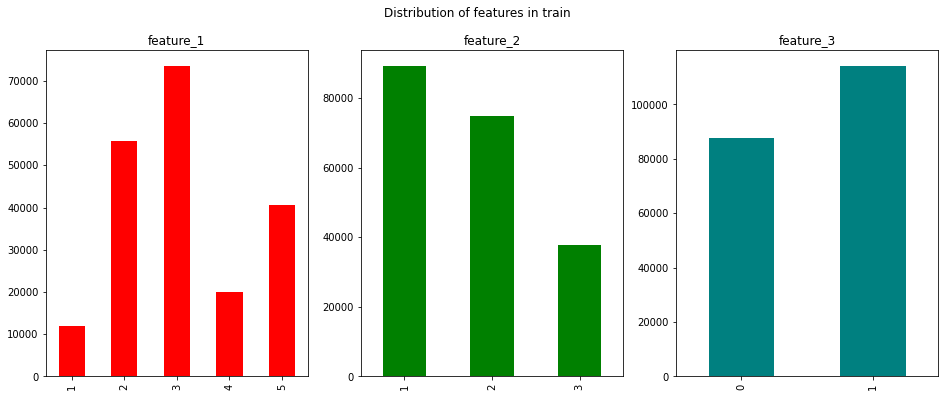

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6))
plt.suptitle('Distribution of features in train')
features = ['feature_1','feature_2','feature_3']
colors = ['red', 'green', 'teal']

for idx, feature in enumerate(features):
  train[feature].value_counts().sort_index().plot(kind='bar', ax=ax[idx], color=colors[idx], title=feature)
  

All the anonymized features are categorical

feature_1 can take five values[1,2,3,4,5]

feature_2 can take three values[1,2,3]

feature_1 can take two values[0,1]

Since all these features are categorical they should be one hot encoded.



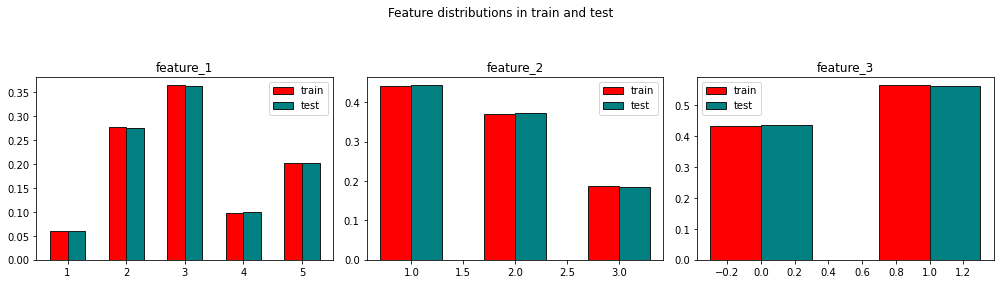

In [ ]:
#https://www.kaggle.com/batalov/making-sense-of-elo-data-eda

plt.figure(figsize=[14,6])
plt.suptitle('Feature distributions in train and test', fontsize=12, y=1.1)
for num, col in enumerate(['feature_1', 'feature_2', 'feature_3']):
    plt.subplot(2, 3, num+1)
    if col is not 'target':
        v_c = train[col].value_counts() / train.shape[0]
        plt.bar(v_c.index, v_c, label=('train'), align='edge', width=-0.3, edgecolor=[0.1]*3, color='red')
        v_c = test[col].value_counts() / test.shape[0]
        plt.bar(v_c.index, v_c, label=('test'), align='edge', width=0.3, edgecolor=[0.1]*3,color='teal')
        plt.title(col)
        plt.legend()
    plt.tight_layout()
plt.tight_layout()
plt.show()

There are no differences in the train and test distribution. Both the distribution looks identical

So, I guess we don't have to do time based splitting since the distribution of the train and test set are same

### 3.1.4) Let's plot the features against the target variable

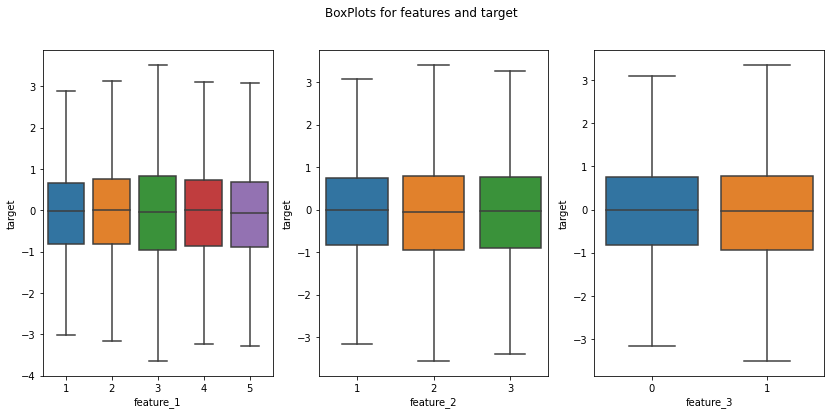

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (14, 6))
plt.suptitle('BoxPlots for features and target')
for idx, feature in enumerate(features):
  sns.boxplot(x=feature, y="target", data=train, ax=ax[idx], showfliers=False)

The distribution of the features w.r.t the target all looks same. So these features may not be helpful in predicting the target.

We might need to engineer new features based off of these features.

### 3.1.5) Investigating Target Variable

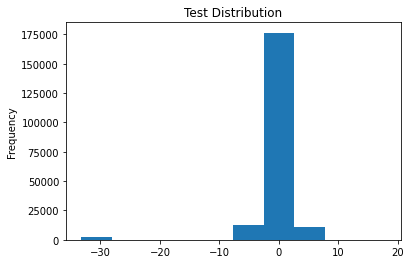

In [ ]:
train['target'].plot(kind='hist',title='Test Distribution')

Looks interesting!
The values are normally distributed around mean 0.
However if you take a closer look there are some outliers at -30.
 
Let's zoom in to the values less than -20.

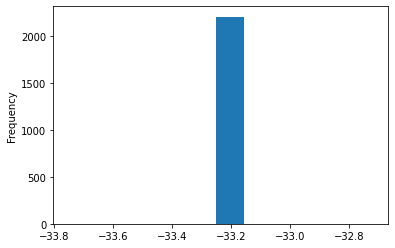

In [ ]:
train['target'][train['target']< -20].plot.hist()

There are quite a lot of them. Let's find the exact number.

In [ ]:
train['target'][train['target']<-30].count()

2207

There are a total of 2207 outliers.

Since there are these many outliers we need to find a way to handle them.

Apparantly dropping these outliers is not an option as these proportion of outliers could be in the test set also.

 One way is that we could crete a new column and mark them as outliers or not and see whether the model could make any sense out of it.

Since there are outliers let's once again plot the features against the target variable however 

this time without the outliers

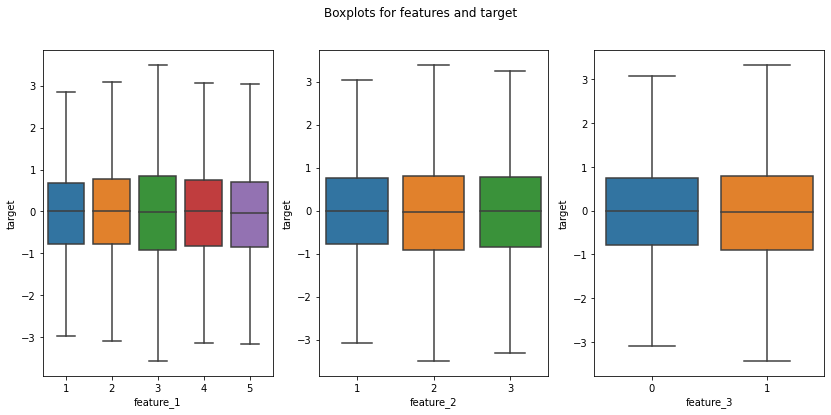

In [ ]:
'''
we are terming anything less than -30 in the target variable as outliers. So we are creating a new dataframe train_no_out
which contains rows without outliers.
Then we can plot a boxplot in this new dataframe to see whether the features can be useful.
'''

train_no_out = train.loc[train['target'] > -30]

fig, ax = plt.subplots(1, 3, figsize = (14, 6))
plt.suptitle('Boxplots for features and target')
for idx, feature in enumerate(features):
  sns.boxplot(x=feature, y="target", data=train_no_out, ax=ax[idx], showfliers=False)

Even after removing the outliers the features doesn't seem to separte the target classes. They still they look the same. 

So we definitely need to create new features.

### 3.1.6) first_active_month

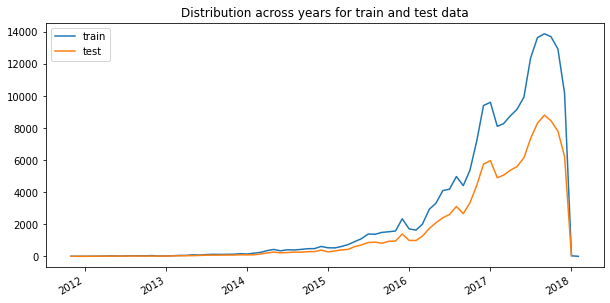

In [ ]:
#https://www.kaggle.com/tminima/elo-eda
'''
getting the number of transactions for every year both train and test separately
so that we can plot the distribution of values for train and test data.
'''
labels=['train','test']

temp = train.first_active_month.value_counts().sort_index()
temp1 = test.first_active_month.value_counts().sort_index()

ax = temp.plot(figsize=(10, 5))
ax = temp1.plot(figsize=(10,5))

ax.set_title("Distribution across years for train and test data")
ax.legend(labels)

This feature the first active month tells us when the first purchase was made through out years.

Here the train and test distribution looks same. Since they look similar except for the frequency, we don't have to do time based splitting

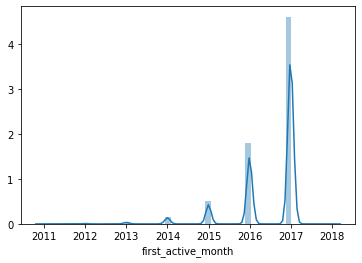

In [ ]:
year = pd.DatetimeIndex(train['first_active_month']).year
month = pd.DatetimeIndex(train['first_active_month']).month
sns.distplot(year)

The above plot gives us the number of cards which made their first purchase each year.

In the given data the maximum number of first purchase is made in the year 2017. There is a sharp decline in the number of cards first active in the year 2018. This could be because we have fewer data for that year. 

Let's check that quickly

In [ ]:
year.value_counts()

2017    130519
2016     51277
2015     14142
2014      4523
2013      1129
2012       282
2018        35
2011        10
Name: first_active_month, dtype: int64

As you can see there are only 35 entries for the year 2018. So that is the reason for the sharp decline in the graph.

Let's proceed further and visualize this feature for each month across years and see whether we can get any 

useful information from it.

#### Let's visualize this feature across months for all the years

In [ ]:
'''
create a new dataframe t and get only the column
frist_active_month from the train set so we can separter the
year and month and visualize this feature monthwise for every year.
'''
t = train[['first_active_month']]
t['year'] = pd.DatetimeIndex(t['first_active_month']).year
t['month'] = pd.DatetimeIndex(t['first_active_month']).month_name()
t

,first_active_month,year,month
0,2017-06-01,2017,June
1,2017-01-01,2017,January
2,2016-08-01,2016,August
3,2017-09-01,2017,September
4,2017-11-01,2017,November
...,...,...,...
201912,2017-09-01,2017,September
201913,2015-10-01,2015,October
201914,2017-08-01,2017,August
201915,2016-07-01,2016,July


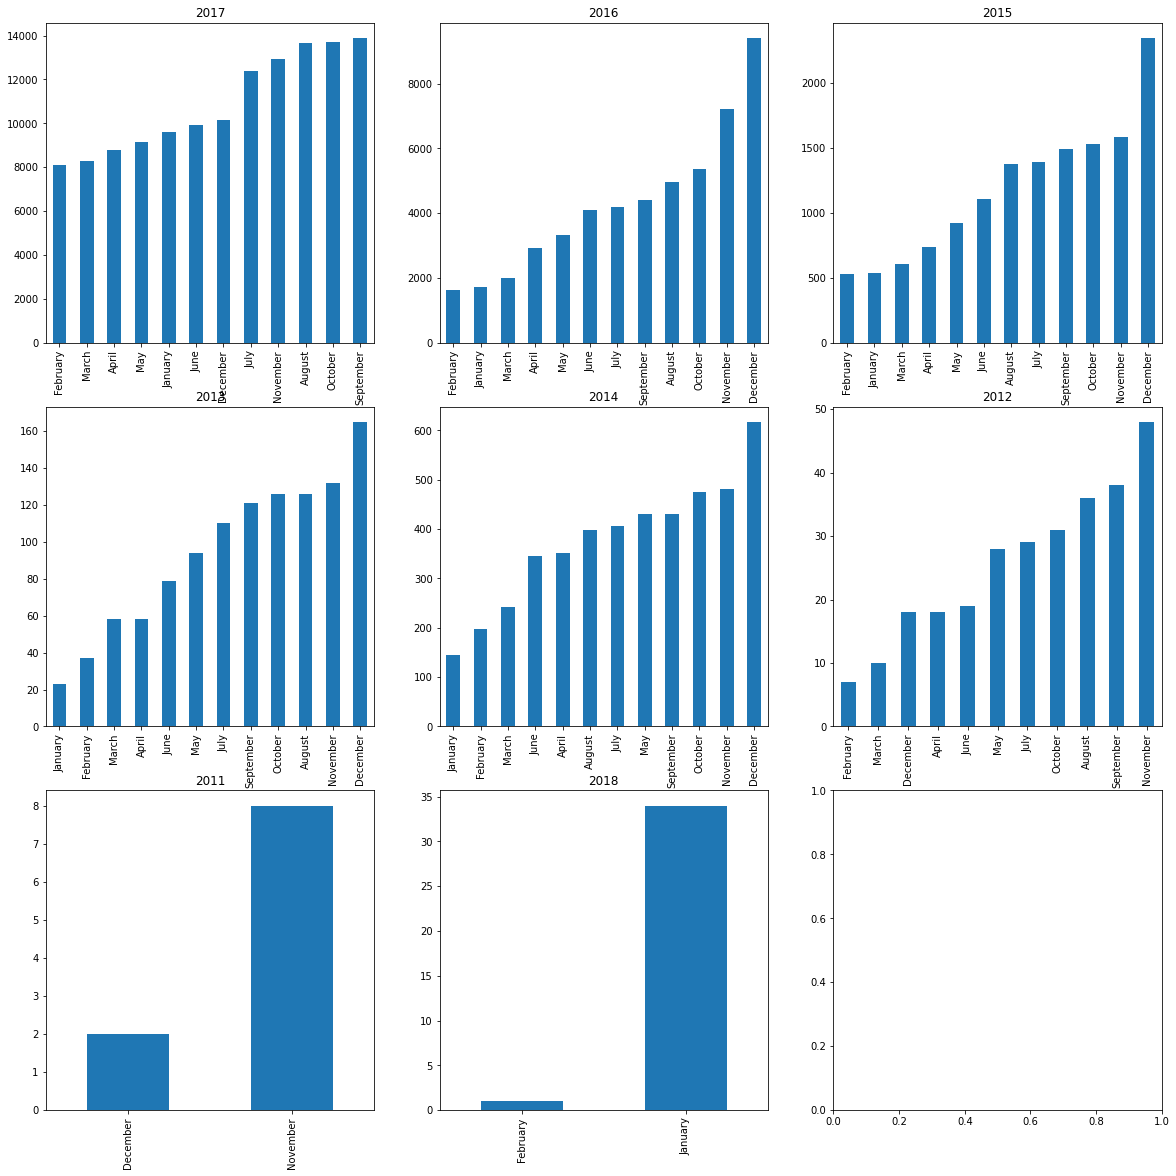

In [ ]:
'''
find the number of unique values in the year.
Now group the dataframe using year and find the value count of each month for
every year. So that we can plot the purchases for every month year wise.
'''
%matplotlib inline
fig, ax = plt.subplots(3, 3, figsize = (20, 20))
ax = ax.ravel()

y = t['year'].unique()

for idx, year in enumerate(y):
 t.groupby('year').get_group(year)['month'].value_counts().sort_values().plot(kind='bar',ax=ax[idx], title=year)

In almost all the year the first_purchase was made in the month december. May be due christmas and new year the credit card company might rolled out some new offers.

For year 2011 and 2018 only two months data are available

Other than these there is not much we can use for further analysis

#### Correlation between the features in train

In [ ]:
cols = ['feature_1','feature_2','feature_3']

n = train[cols]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(n.iloc[:,:].values, i) for i in range(n.shape[1])]
vif["features"] = n.columns
vif

,VIF Factor,features
0,5.751775,feature_1
1,3.388442,feature_2
2,3.390544,feature_3


The VIF values for all the three features are well under 10. So there is no problem of multicollinearity in the train data.

## 3.2) Explore Historical Transaction

### 3.2.1) Overview

In [ ]:
print('The shape of the data is:', ht.shape)

The shape of the data is: (29112361, 14)


In [ ]:
ht.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [ ]:
ht.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

There are null values in the features category_3, merchant_id and category_2.

Since category_2 and 3 are categorical we could lable encode them and create a new category for the missing values.

### 3.2.2) Let's calculate the percentage of missing values

In [ ]:
print('Percentage of missing values in merchant_id:',ht['merchant_id'].isnull().sum() / len(ht)*100,'%')
print('Percentage of missing values in category_2:',ht['category_2'].isnull().sum() / len(ht)*100,'%')
print('Percentage of missing values in category_3:',ht['category_3'].isnull().sum() / len(ht)*100,'%')

Percentage of missing values in merchant_id: 0.4756776683278969 %
Percentage of missing values in category_2: 9.1125003568072 %
Percentage of missing values in category_3: 0.6119702898710276 %


Since there are more than 9% of missing values in category_2 we cannot simply drop them. We need find a way to impute them. The other two features merchant_id and category_3 has fewer than 1% of missing values so we can safely drop them.

In [ ]:
print('Percentage missing values in the whole dataset:', ht.isnull().sum().sum() / len(ht) * 100, '%')

Percentage missing values in the whole dataset: 10.200148315006125 %


### 3.2.3) Exploring Authorized Flag

Let's find out how many transactions are authorized.

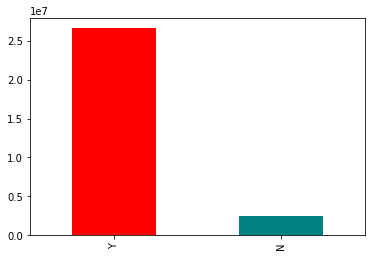

In [ ]:
ht['authorized_flag'].value_counts().plot(kind='bar',color=['red','teal'])

There are some notable amount of unauthorized transactions. Here Y means authorizedd and N means unauthorized.

Let's find the percentage of unauthorized transactions.

In [ ]:
print('Number of authorized transactions:',ht['authorized_flag'].value_counts()['Y'])
print('Number of un-authorized transactions:',ht['authorized_flag'].value_counts()['N'])
print('Percentage of authorized transactions:', round(ht['authorized_flag'].value_counts()['Y'] / len(ht) * 100,2),'%')
print('Percentage of un-authorized transactions:', round(ht['authorized_flag'].value_counts()['N'] / len(ht) * 100,2),'%')

Number of authorized transactions: 26595452
Number of un-authorized transactions: 2516909
Percentage of authorized transactions: 91.35 %
Percentage of un-authorized transactions: 8.65 %


About 9% of the transactions are unauthorized. So these can be a good feature to predict the loyalty score for the customers.

While doing feature engineering we could create features separately for authorized and unauthorized.

In [ ]:
# mapping Y to 1 and N to 0
ht['authorized_flag'] = ht['authorized_flag'].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
a = ht.groupby('card_id')['authorized_flag'].value_counts().sort_values(ascending=False)
a.describe()

count    601241.000000
mean         48.420452
std          82.286143
min           1.000000
25%           6.000000
50%          18.000000
75%          55.000000
max        4122.000000
Name: authorized_flag, dtype: float64

In [ ]:
a

card_id          authorized_flag
C_ID_3d3dfdc692  1                  4122
C_ID_0cd2ce025c  1                  2537
C_ID_cc3d4cd4e3  1                  2027
C_ID_5ccc07beb9  1                  1963
C_ID_9f81506906  1                  1592
                                    ... 
C_ID_44f218940c  0                     1
C_ID_30a18c60cb  0                     1
C_ID_44f23504f3  0                     1
C_ID_7b965f1865  0                     1
C_ID_7521e9958a  0                     1
Name: authorized_flag, Length: 601241, dtype: int64

### 3.2.4) Installment

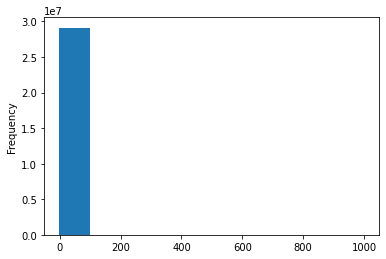

In [ ]:
ht['installments'].plot(kind='hist')

Looks strange. The value of x that is the installments ranges from -1 to 1000. The installment cannot take values like 1000. That is not sensible.

So, let's check the value counts

In [ ]:
ht['installments'].value_counts()

 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: installments, dtype: int64

Looks like the values -1 and 999 could be used to fill missing values. Or these values could be to denote a fraud transaction. Especially the value 999 could be to denote the unauthorized transactions.

Let's see how many transactions are authorized if the installment value is 999

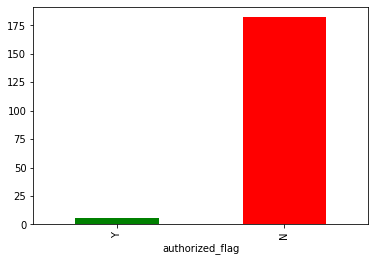

In [ ]:
f = ht.groupby(['installments'])['authorized_flag'].value_counts()[999].sort_values(ascending=True).plot(kind='bar',color=['green','red'])

In [ ]:
ht.groupby(['installments'])['authorized_flag'].value_counts()[999]

authorized_flag
N    182
Y      6
Name: authorized_flag, dtype: int64

As we can see from the above plot there are only 3% of authorized transactions. So this value could be because the transaction is fraud. This could serve as a good feature

In [ ]:
f.head

<bound method NDFrame.head of installments  authorized_flag
-1            Y                    157794
              N                     20365
 0            Y                  14302589
              N                   1109158
 1            Y                  10591787
              N                   1085735
 2            Y                    589125
              N                     77291
 3            Y                    464071
              N                     74136
 4            Y                    147193
              N                     32332
 5            Y                     93938
              N                     22152
 6            Y                    103419
              N                     29215
 7            Y                      7560
              N                      3346
 8            Y                     14177
              N                      6297
 9            Y                      3831
              N                      1941
 10           Y 

If we take a look at the value 999 from the above table out of all the 188 entries 182 almost 97% of transactions were not authorized. So it could mean fraud transaction. Let's remove it and plot the values.

#### Let's plot the histogram with range(0,12) removing -1 and 999

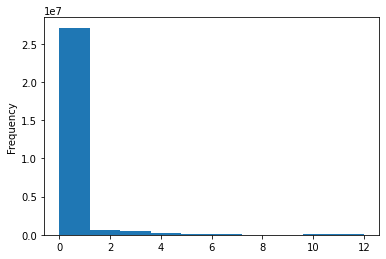

In [ ]:
ht['installments'].plot(kind='hist', range=[0,12])

In [ ]:
ht['installments'].value_counts()

 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: installments, dtype: int64

Large number of the values are either 0 or 1. In most the cases there are no installments or an installment of 1 month.

In [ ]:
# getting MEMORY ERROR DON'T RUN IT
cols = ['authorized_flag','city_id','category_1','installments','category_3','merchant_category_id','month_lag','purchase_amount','category_2','state_id', 'subsector_id']
d = {'A':1,'B':2,'C':3}
x = {'Y':1,'N':0}

n = ht[cols]
n['category_3'] = n['category_3'].map(d)
n['category_1'] = n['category_1'].map(x)
n['authorized_flag'] = n['authorized_flag'].map(x)

n = n.dropna()

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(n.iloc[:,:].values, i) for i in range(n.shape[1])]
vif["features"] = n.columns
vif

### 3.2.5) Let's check the features category_1, category_2, category_3

In [ ]:
# convert the column type to category so we can find the correlation between them
# by default it is in object.
col = ['category_1', 'category_2', 'category_3']
for c in col:
  if c in ht.columns:
    ht[c] = ht[c].astype('category')

In [ ]:
#https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas
corr = ht[['category_1','category_2','category_3']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

In [ ]:
# normalizing the values so it between 0 and 1
corr_norm=np.round((corr-corr.min())/(corr.max()-corr.min()), 3)

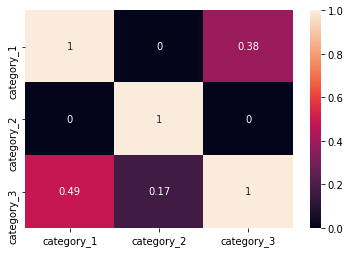

In [ ]:
sns.heatmap(corr_norm, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

Looks like category3 and category1 are correlated. Since these features are anonyized we don't have a clear idea of what these features are?

So instead of dropping this strightaway we could train model with and without it and see the performance changes. 

In [ ]:
ht['category_1'].value_counts()

N    27028332
Y     2084029
Name: category_1, dtype: int64

In [ ]:
ht['category_2'].value_counts()

1.0    15177199
3.0     3911795
5.0     3725915
4.0     2618053
2.0     1026535
Name: category_2, dtype: int64

In [ ]:
ht['category_3'].value_counts()

A    15411747
B    11677522
C     1844933
Name: category_3, dtype: int64

The category_1 takes two values Y, N

The category_2 takes five values 1,2,3,4,5

The category_3 takes three values A,B,C

## 3.3) Merchant

### 3.3.1) Overview

In [ ]:
print('The shape of the data is:', merchant.shape)

The shape of the data is: (334696, 22)


In [ ]:
merchant.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057465,-0.057465,N,E,E,-0.400000,9.666667,3,-2.250000,18.666667,6,-2.320000,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057465,-0.057465,N,E,E,-0.720000,1.750000,3,-0.740000,1.291667,6,-0.570000,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057465,-0.057465,N,E,E,-82.129997,260.000000,2,-82.129997,260.000000,2,-82.129997,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057465,-0.057465,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057465,-0.057465,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [ ]:
merchant.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

There are few null values in lag 3,6 and 12 and around 11887 in category_2..

Other than category_2 there are very few missing values. So we could drop them.

In [ ]:
print('Percentage of missing values in avg_sales_lag3:', merchant['avg_sales_lag3'].isnull().sum() / len(merchant['avg_sales_lag3']) * 100, '%')
print('Percentage of missing values in avg_sales_lag6:', merchant['avg_sales_lag6'].isnull().sum() / len(merchant['avg_sales_lag6'])* 100, '%')
print('Percentage of missing values in avg_sales_lag12:', merchant['avg_sales_lag12'].isnull().sum() / len(merchant['avg_sales_lag12'])* 100, '%')
print('Percentage of missing values in category_2:', merchant['category_2'].isnull().sum() / len(merchant['category_2'])* 100, '%')

Percentage of missing values in avg_sales_lag3: 0.0038841217104476898 %
Percentage of missing values in avg_sales_lag6: 0.0038841217104476898 %
Percentage of missing values in avg_sales_lag12: 0.0038841217104476898 %
Percentage of missing values in category_2: 3.551581136314745 %


In [ ]:
print('Percentage of missing values in the dataset:', merchant.isnull().sum().sum() / len(merchant) * 100, '%')

Percentage of missing values in the dataset: 3.5632335014460885 %


### 3.3.2) Exploring the features numerical1 and numerical2

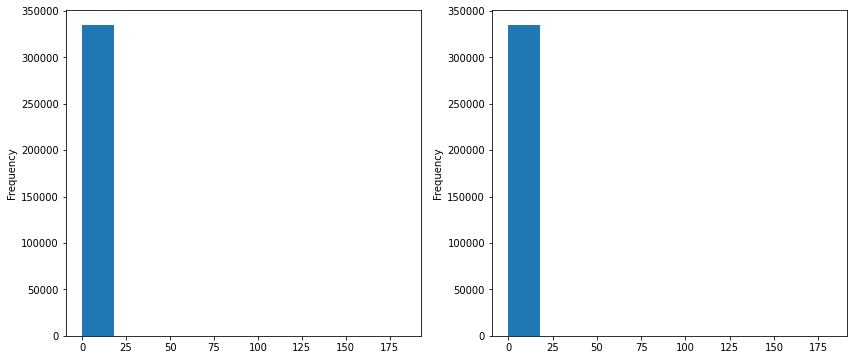

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
merchant['numerical_1'].plot(kind='hist', ax=ax[0])
merchant['numerical_2'].plot(kind='hist', ax=ax[1])

The distribution of the values for both the columns looks same.

Let's confirm this with box plot.

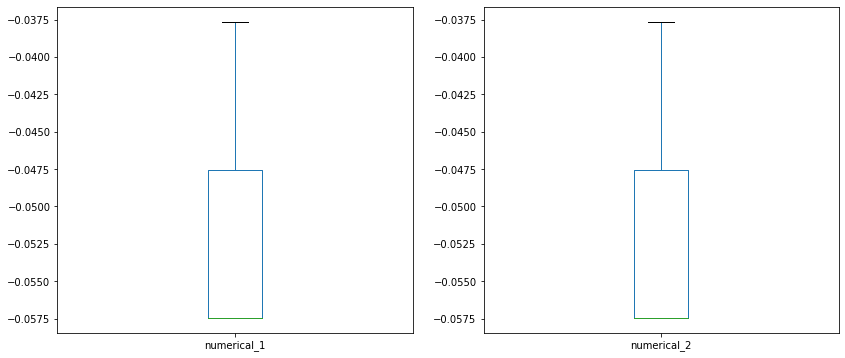

In [ ]:
'''
box plot for the features numerical_1 and numerical_2
Here the showfliers is set to False i.e., it will not
show the outliers.
The reason to set it to False is if we set it to True
the plot becomes too congested and it kind of getting contracted to the middle.
However, since we are not performing outlier detection it is not important so
we can set it to False. 
'''

fig, ax = plt.subplots(1, 2, figsize = (14, 6))
merchant['numerical_1'].plot(kind='box', showfliers=False, ax=ax[0])
merchant['numerical_2'].plot(kind='box',showfliers=False, ax=ax[1])

These two features looks exactly the same. Let's take a look at the five number summary

In [ ]:
print(merchant['numerical_1'].describe())
print(merchant['numerical_2'].describe())

count    334696.000000
mean          0.011482
std           0.000000
min          -0.057465
25%          -0.057465
50%          -0.057465
75%          -0.047546
max         183.750000
Name: numerical_1, dtype: float64
count    334696.000000
mean          0.008095
std           0.000000
min          -0.057465
25%          -0.057465
50%          -0.057465
75%          -0.047546
max         182.125000
Name: numerical_2, dtype: float64


The distribution of values for the two features looks identical. Both the features have the same 5 number stats like mean, std, max etcetera. 

Let's find the value counts

In [ ]:
merchant['numerical_1'].value_counts()

-0.057465      228788
-0.047546       41528
-0.037628       15689
-0.027725        8297
-0.017807        5249
                ...  
 20.593750          1
 7.250000           1
 13.890625          1
 107.625000         1
 8.000000           1
Name: numerical_1, Length: 950, dtype: int64

The value -0.057465 occurs a lot of times. Let's find the percentage

In [ ]:
# calculating in what percentage the values are appearing in the dataset by dividing with the length of the data

merchant['numerical_1'].value_counts()/len(merchant)

-0.057465      0.683570
-0.047546      0.124077
-0.037628      0.046875
-0.027725      0.024790
-0.017807      0.015683
                 ...   
 20.593750     0.000003
 7.250000      0.000003
 13.890625     0.000003
 107.625000    0.000003
 8.000000      0.000003
Name: numerical_1, Length: 950, dtype: float64

The value -0.057465 occurs over 68%.

In [ ]:
# calculating in what percentage the values are appearing in the datasetby dividing with the length of the data 
merchant['numerical_2'].value_counts()/len(merchant)

-0.057465     0.743104
-0.047546     0.099434
-0.037628     0.034790
-0.027725     0.018315
-0.017807     0.011811
                ...   
 10.039062    0.000003
 24.187500    0.000003
 5.593750     0.000003
 6.039062     0.000003
 16.015625    0.000003
Name: numerical_2, Length: 944, dtype: float64

Similarly, In numerical_2 feature too the value -0.057465 occurs around 74%.

Still not clear what these features are.  

It looks more of a categorical feature rather than numerical. It takes only 950 unique values given there are over 300000 points.

However if it's a numerical I don't think these features will be useful since their variance is 0 and contains a lot of constant values.

Anyway let's move forward.

In [ ]:
print(len(merchant['numerical_1'].unique().tolist()))
print(len(merchant['numerical_2'].unique().tolist()))
print(len(merchant))

950
944
334696


### 3.3.3) Now let's take a look at the anonymized Category_1,2 and 4 features

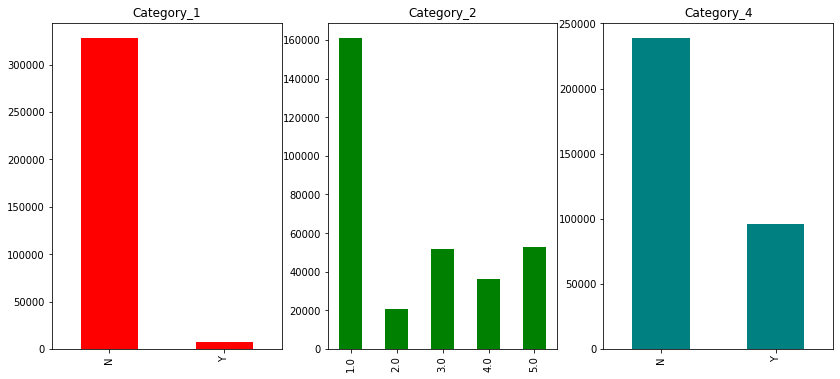

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (14, 6))
merchant['category_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='red', title='Category_1')
merchant['category_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='green', title='Category_2')
merchant['category_4'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='teal', title='Category_4')

All the three features are caategorical.

1) Category_1 takes two values [Y, N]

2) Category_2 takes five values [1,2,3,4,5]

3) Category_3 takes two values [Y,N]

Should be one hot encoded as these are categoricaal

### 3.3.4) Average sales lag

In [ ]:
print(merchant['avg_sales_lag3'].describe())
print(merchant['avg_sales_lag6'].describe())
print(merchant['avg_sales_lag12'].describe())

count    334683.000000
mean         13.839176
std        2395.453369
min         -82.129997
25%           0.880000
50%           1.000000
75%           1.160000
max      851844.625000
Name: avg_sales_lag3, dtype: float64
count    3.346830e+05
mean     2.165529e+01
std      3.947046e+03
min     -8.213000e+01
25%      8.500000e-01
50%      1.010000e+00
75%      1.230000e+00
max      1.513959e+06
Name: avg_sales_lag6, dtype: float64
count    3.346830e+05
mean     2.523122e+01
std      5.251777e+03
min     -8.213000e+01
25%      8.500000e-01
50%      1.020000e+00
75%      1.290000e+00
max      2.567408e+06
Name: avg_sales_lag12, dtype: float64


#### Let's plot the distribution of data

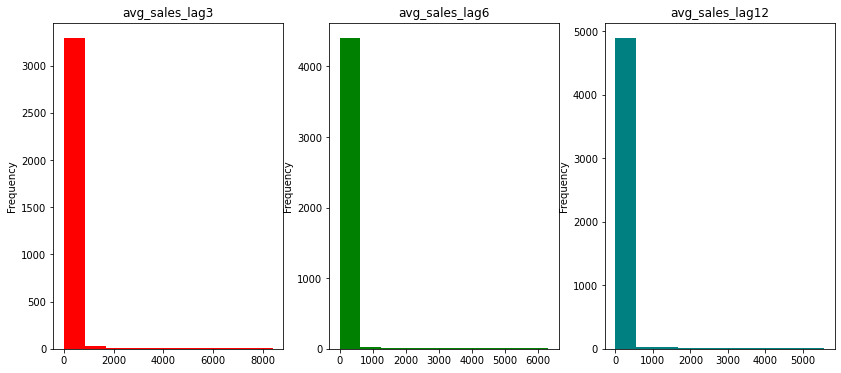

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (14, 6))
merchant['avg_sales_lag3'].value_counts().sort_index().plot(kind='hist', ax=ax[0], color='red', title='avg_sales_lag3')
merchant['avg_sales_lag6'].value_counts().sort_index().plot(kind='hist', ax=ax[1], color='green', title='avg_sales_lag6')
merchant['avg_sales_lag12'].value_counts().sort_index().plot(kind='hist', ax=ax[2], color='teal', title='avg_sales_lag12')

Looks like all the three sales_lag distribution are similar. A lot of values are within may be 20. However as we can see from the plots there are also few extreme values which is greater than 8000.

To get a better picture of the values let's print the value counts and also will see the maximum value in each of the feature

In [ ]:
merchant['avg_sales_lag3'].value_counts()

1.000000       8411
0.980000       7953
0.990000       7891
0.970000       7663
0.960000       7572
               ... 
48.070000         1
24.049999         1
48.119999         1
48.130001         1
2964.659912       1
Name: avg_sales_lag3, Length: 3372, dtype: int64

In [ ]:
max(merchant['avg_sales_lag3'])

851844.625

In [ ]:
merchant['avg_sales_lag6'].value_counts()

1.000000      6310
0.980000      5898
0.950000      5846
0.970000      5803
0.960000      5801
              ... 
172.059998       1
43.009998        1
22.280001        1
54.490002        1
255.899994       1
Name: avg_sales_lag6, Length: 4507, dtype: int64

In [ ]:
merchant['avg_sales_lag12'].value_counts()

1.000000      5565
0.990000      5160
0.970000      5145
0.980000      5088
0.960000      5025
              ... 
48.450001        1
96.839996        1
15.840000        1
12.100000        1
186.410004       1
Name: avg_sales_lag12, Length: 5009, dtype: int64

There are few extreme values in each feature might be outlier and should be handled appropriately.

In [ ]:
print(max(merchant['avg_sales_lag3']))
print(max(merchant['avg_sales_lag6']))
print(max(merchant['avg_sales_lag12']))

851844.625
1513959.0
2567408.0


### 3.3.5) Average purchase lags

In [ ]:
print(merchant['avg_purchases_lag3'].describe())
print(merchant['avg_purchases_lag6'].describe())
print(merchant['avg_purchases_lag12'].describe())

count    3.346960e+05
mean              inf
std               NaN
min      3.334953e-01
25%      9.236499e-01
50%      1.016667e+00
75%      1.146522e+00
max               inf
Name: avg_purchases_lag3, dtype: float64
count    3.346960e+05
mean              inf
std               NaN
min      1.670447e-01
25%      9.022475e-01
50%      1.026961e+00
75%      1.215575e+00
max               inf
Name: avg_purchases_lag6, dtype: float64
count    3.346960e+05
mean              inf
std               NaN
min      9.832954e-02
25%      8.983333e-01
50%      1.043361e+00
75%      1.266480e+00
max               inf
Name: avg_purchases_lag12, dtype: float64


For all the three features the max value is 'inf' and because of that the mean and the std values are getting goofed up. 

So we need to take care of them. Let's investigate the inf values.

In [ ]:
# selecting rows which have value inf in the avg_purchases_lag3
merchant[merchant['avg_purchases_lag3']==np.inf]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
10,M_ID_492cfa500c,13462,369,27,-0.057465,-0.057465,N,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,N,-1,9,1.0
11,M_ID_73487fed26,17123,427,27,-0.057465,-0.057465,Y,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,Y,-1,-1,NaN
12,M_ID_7149162139,2118,63,27,-0.057465,-0.057465,N,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,Y,88,16,1.0


In [ ]:
# selecting rows which have value inf in the avg_purchases_lag6
merchant[merchant['avg_purchases_lag6']==np.inf]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
10,M_ID_492cfa500c,13462,369,27,-0.057465,-0.057465,N,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,N,-1,9,1.0
11,M_ID_73487fed26,17123,427,27,-0.057465,-0.057465,Y,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,Y,-1,-1,NaN
12,M_ID_7149162139,2118,63,27,-0.057465,-0.057465,N,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,Y,88,16,1.0


In [ ]:
# selecting rows which have value inf in the avg_purchases_lag12
merchant[merchant['avg_purchases_lag12']==np.inf]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
10,M_ID_492cfa500c,13462,369,27,-0.057465,-0.057465,N,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,N,-1,9,1.0
11,M_ID_73487fed26,17123,427,27,-0.057465,-0.057465,Y,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,Y,-1,-1,NaN
12,M_ID_7149162139,2118,63,27,-0.057465,-0.057465,N,E,E,NaN,inf,3,NaN,inf,6,NaN,inf,12,Y,88,16,1.0


All the inf are for the same merchants

Since this value is calculated by Monthly average of transactions in last 3 months divided by transactions in last active month if the transactions in the last active month is 0 then this value could be inf. We can drop these 3 rows and proceed further

In [ ]:
'''
selecting rows where avg_purchases_lag3 is not inf and save it in a new DF. 
So we can perform basic summary stats.
'''
merchant_no_inf = merchant[merchant['avg_purchases_lag3']!=np.inf]
merchant_no_inf.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057465,-0.057465,N,E,E,-0.400000,9.666667,3,-2.250000,18.666667,6,-2.320000,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057465,-0.057465,N,E,E,-0.720000,1.750000,3,-0.740000,1.291667,6,-0.570000,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057465,-0.057465,N,E,E,-82.129997,260.000000,2,-82.129997,260.000000,2,-82.129997,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057465,-0.057465,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057465,-0.057465,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [ ]:
print(merchant_no_inf['avg_purchases_lag3'].describe())
print(merchant_no_inf['avg_purchases_lag6'].describe())
print(merchant_no_inf['avg_purchases_lag12'].describe())

count    334693.000000
mean          1.590762
std         107.187059
min           0.333495
25%           0.923650
50%           1.016667
75%           1.146520
max       61851.333333
Name: avg_purchases_lag3, dtype: float64
count    334693.000000
mean          1.887568
std          97.862790
min           0.167045
25%           0.902245
50%           1.026961
75%           1.215556
max       56077.500000
Name: avg_purchases_lag6, dtype: float64
count    334693.000000
mean          2.079195
std          88.442384
min           0.098330
25%           0.898333
50%           1.043360
75%           1.266461
max       50215.555556
Name: avg_purchases_lag12, dtype: float64


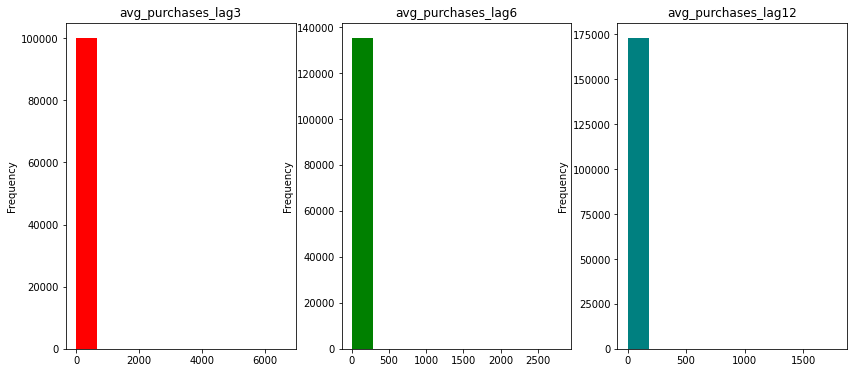

In [ ]:
# plotting the distribution of data without the inf values
fig, ax = plt.subplots(1, 3, figsize = (14, 6))
merchant['avg_purchases_lag3'].value_counts().sort_index().plot(kind='hist', ax=ax[0], color='red', title='avg_purchases_lag3')
merchant['avg_purchases_lag6'].value_counts().sort_index().plot(kind='hist', ax=ax[1], color='green', title='avg_purchases_lag6')
merchant['avg_purchases_lag12'].value_counts().sort_index().plot(kind='hist', ax=ax[2], color='teal', title='avg_purchases_lag12')

### 3.3.6) Let's explore sales range

In [ ]:
merchant['most_recent_sales_range'].value_counts()

E    177104
D    117475
C     34075
B      5037
A      1005
Name: most_recent_sales_range, dtype: int64

In [ ]:
merchant['most_recent_purchases_range'].value_counts()

E    175309
D    119187
C     34144
B      5046
A      1010
Name: most_recent_purchases_range, dtype: int64

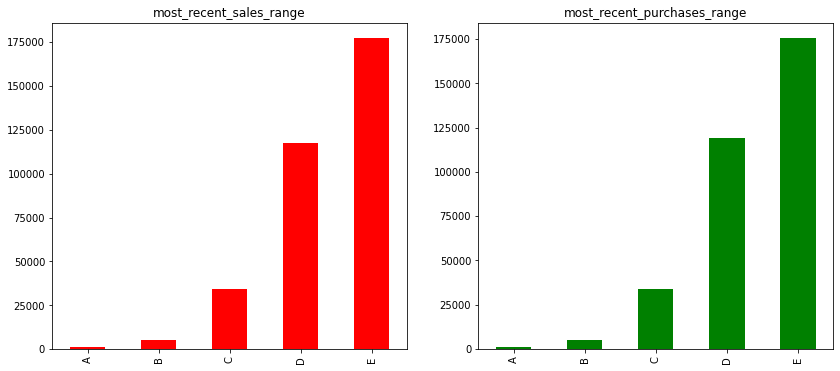

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
merchant['most_recent_sales_range'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='red', title='most_recent_sales_range')
merchant['most_recent_purchases_range'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='green', title='most_recent_purchases_range')

No wonder they look the same. Because it is the recent sales and the recent purchases. As recent sales increase the recent purchase will also increase for that particular date

These two values could be correlated. Let's confirm it.

In [ ]:
#selecting only the specified columns from the merchant and save it in a separate DF
cols = ['most_recent_sales_range', 'most_recent_purchases_range']
m = merchant[cols]

In [ ]:
#encoding the cat variables with 1 to 5
d = {'A':1, 'B':2, 'C':3, 'D':4,'E':5}
m['most_recent_purchases_range'] = m['most_recent_purchases_range'].map(d)
m['most_recent_sales_range'] = m['most_recent_sales_range'].map(d)

In [ ]:
#calculating variance inflation factor for the two columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(m.iloc[:,:].values, i) for i in range(m.shape[1])]
vif["features"] = m.columns
vif

,VIF Factor,features
0,63.52409,most_recent_sales_range
1,63.52409,most_recent_purchases_range


The VIF value is around 64 denotes that these values are correlated. So we need to drop any one of the variable. Or we could do dummy variable encoding and check the score again.

Let's print the correlation matrix for all the features.

#### Correlation between variables

##### Variance Inflation Factor

In [ ]:
cols = ['active_months_lag3','active_months_lag6','active_months_lag12','numerical_1', 'numerical_2','avg_sales_lag3','avg_sales_lag6','avg_purchases_lag3','avg_sales_lag12','avg_purchases_lag12','avg_purchases_lag6','category_2','state_id']
merchi = merchant[cols]
merchi = merchi.dropna()

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(merchi.iloc[:,:].values, i) for i in range(merchi.shape[1])]
vif["features"] = merchi.columns
vif

,VIF Factor,features
0,517.963454,active_months_lag3
1,888.058008,active_months_lag6
2,148.780422,active_months_lag12
3,398.608414,numerical_1
4,398.584669,numerical_2
5,45.881735,avg_sales_lag3
6,252.021712,avg_sales_lag6
7,398.529760,avg_purchases_lag3
8,130.293237,avg_sales_lag12
9,580.462034,avg_purchases_lag12


Looks like there are variables which are heavily correlated like active_months_lag6, numerical_1 and 2, avg_purchase_lag6 and avg_sales_lag_6 and avg_purchase_lag12

Let's remove some of the variables and again we'll calculate the VIF

In [ ]:
cols = ['active_months_lag3','active_months_lag12','numerical_1', 'avg_sales_lag3','avg_purchases_lag3','avg_sales_lag12','avg_purchases_lag12','category_2','state_id']
merchi = merchant[cols]
merchi = merchi.dropna()

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(merchi.iloc[:,:].values, i) for i in range(merchi.shape[1])]
vif["features"] = merchi.columns
vif

,VIF Factor,features
0,77.199413,active_months_lag3
1,70.037085,active_months_lag12
2,1.000416,numerical_1
3,2.756102,avg_sales_lag3
4,79.868728,avg_purchases_lag3
5,1.801982,avg_sales_lag12
6,78.972876,avg_purchases_lag12
7,3.326589,category_2
8,5.576621,state_id


As we can see that after removing some of the correlated variables we can see that VIF score reduces significantly.

However there are still values which are above 10. However it is less than 100. So instead of removing them straightaway it needs further investigation.

Let's plot the correlation matrix

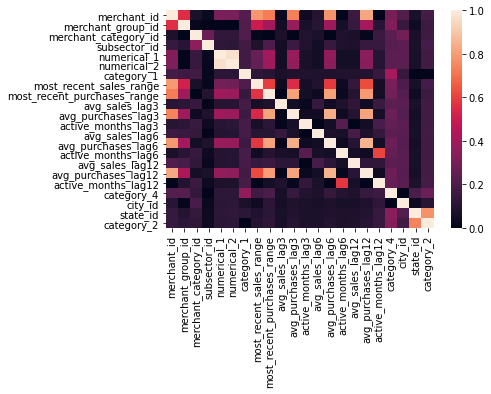

In [ ]:
corr = merchant.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr_norm=np.round((corr-corr.min())/(corr.max()-corr.min()), 3)
sns.heatmap(corr_norm, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=False)

As we seen before as the numerical_1 and numerical_2 have similar values and 
distributions and they are correlated

The state_id is correlated with city_id and category_2. Since the anonymized feature category_2 is correlated with state_id I think it is somehow related to location.

There are notable correlations between purchase lags and month lags

merchant_id is correlated with merchant_group_id






## 3.4) new merchants data

### 3.4.1) Overview

In [ ]:
print('The shape of the data is:', new_merchant.shape)

The shape of the data is: (1963031, 14)


In [ ]:
new_merchant.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557617,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569336,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551270,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671875,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659668,2018-03-22 21:07:53,NaN,-1,29


In [ ]:
new_merchant.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

In [ ]:
print('Percentage of missing values in category_3:', new_merchant['category_3'].isnull().sum() / len(new_merchant['category_3']) * 100, '%')
print('Percentage of missing values in category_2:', new_merchant['category_2'].isnull().sum() / len(new_merchant['category_2'])* 100, '%')
print('Percentage of missing values in merchant_id:', new_merchant['merchant_id'].isnull().sum() / len(new_merchant['merchant_id'])* 100, '%')

Percentage of missing values in category_3: 2.8487578647509895 %
Percentage of missing values in category_2: 5.692472508075522 %
Percentage of missing values in merchant_id: 1.3354857870303627 %


In [ ]:
print('Percentage of missing values in the dataset:', new_merchant.isnull().sum().sum() / len(new_merchant) * 100, '%')

Percentage of missing values in the dataset: 9.876716159856874 %


There are null values in category3 and 2 and in merchant_id.

The categorical features can be lable encoded and we can create a separate category for the missing values.

In [ ]:
new_merchant['authorized_flag'].value_counts()

Y    1963031
Name: authorized_flag, dtype: int64

All the transactions are authorized so we don't have to worry about them.

Unlike the historical data where we have a fair share of unauthorized purchases here all the purchases are authorized so it doesn't make sense to create features separately for authorized and unauthorized as I proposed there.

Here since this column has a single value i.e., 1 for all the value this feature can be regarded as a constant feature and we can drop this.

### 3.4.2) purchase date

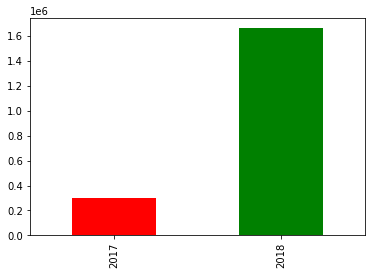

In [ ]:
# get the year from the purchase date
year = pd.DatetimeIndex(new_merchant['purchase_date']).year

#getting the value count so that we can plot the number of purchases for each year
year.value_counts().sort_index().plot(kind='bar', color=['red','green'])

In [ ]:
year.value_counts()

2018    1659548
2017     303483
Name: purchase_date, dtype: int64

Maximum number of purchases are made in the year 2018

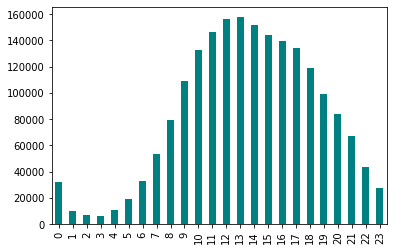

In [ ]:
'''
extract the part hour from the purchase date and 
find the number of purchases for that particular hour using the
value counts so that we can visualize the number of purchases
made during particular time.
'''

hour = pd.DatetimeIndex(new_merchant['purchase_date']).hour
hour.value_counts().sort_index().plot(kind='bar', color='teal')

In [ ]:
hour.value_counts().sort_index()

0      32386
1       9657
2       6635
3       6493
4      10350
5      18876
6      33137
7      53529
8      79204
9     109094
10    132348
11    146332
12    156300
13    157810
14    151863
15    144363
16    139133
17    134024
18    119266
19     99387
20     84076
21     67341
22     43650
23     27777
Name: purchase_date, dtype: int64

A lot of purchases are made between 9am and 6pm.

So creating a feature like hour of the day could be helpful.

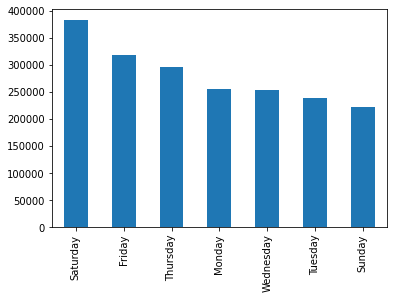

In [ ]:
'''
extract the part day from the purchase date and 
find the number of purchases for that particular day using the
value counts so that we can visualize the number of purchases
made during particular day.
'''

day_name = pd.DatetimeIndex(new_merchant['purchase_date']).day_name()
day_name.value_counts().sort_values(ascending=False).plot(kind='bar')

In [ ]:
day_name.value_counts()

Saturday     382769
Friday       317861
Thursday     295924
Monday       254158
Wednesday    253875
Tuesday      237702
Sunday       220742
Name: purchase_date, dtype: int64

Friday and Saturday there are lot of transactions.

Like the hour feature here we could create a feature like weekend or not as most of the purchases are made on friday and saturdays.

In [ ]:
mont = pd.DatetimeIndex(new_merchant['purchase_date']).month_name()
mont

Index(['March', 'March', 'April', 'March', 'March', 'April', 'March', 'April',
       'April', 'March',
       ...
       'April', 'March', 'March', 'April', 'December', 'April', 'March',
       'March', 'March', 'April'],
      dtype='object', name='purchase_date', length=1963031)

In [ ]:
'''
Extracting the hour, day, month and year from the purchase date
to find out which month has maximum number of purchases 
for each year.
'''
datet = new_merchant[['purchase_date']]
datet['hour']=pd.DatetimeIndex(datet['purchase_date']).hour
datet['mont']=pd.DatetimeIndex(datet['purchase_date']).month_name()
datet['year']=pd.DatetimeIndex(datet['purchase_date']).year
datet['day']=pd.DatetimeIndex(datet['purchase_date']).day_name()
datet

,purchase_date,hour,mont,year,day
0,2018-03-11 14:57:36,14,March,2018,Sunday
1,2018-03-19 18:53:37,18,March,2018,Monday
2,2018-04-26 14:08:44,14,April,2018,Thursday
3,2018-03-07 09:43:21,9,March,2018,Wednesday
4,2018-03-22 21:07:53,21,March,2018,Thursday
...,...,...,...,...,...
1963026,2018-04-06 14:36:52,14,April,2018,Friday
1963027,2018-03-07 13:19:18,13,March,2018,Wednesday
1963028,2018-03-05 12:04:56,12,March,2018,Monday
1963029,2018-03-09 14:47:05,14,March,2018,Friday


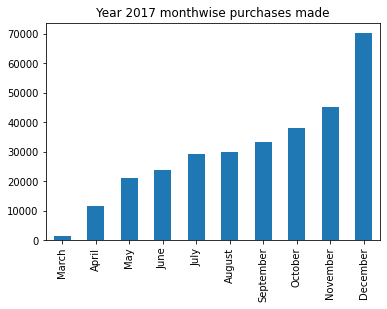

In [ ]:
# groupby year and get the months for the particular year
datet.groupby(['year']).get_group(2017)['mont'].value_counts().sort_values().plot(kind='bar',title='Year 2017 monthwise purchases made')

The month december has large number of purchases. May be because of christmas and new year.

We could create a feature whether the month is a festival month or not.

In [ ]:
#number of transactions made in 2017
datet.groupby(['year']).get_group(2017)['mont'].value_counts().sum()

303483

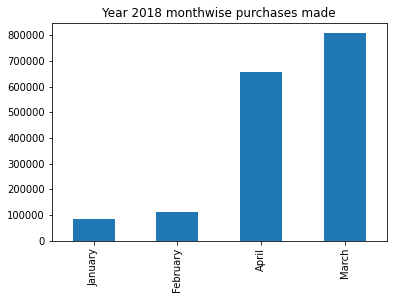

In [ ]:
# groupby year and get the months for the particular year

datet.groupby(['year']).get_group(2018)['mont'].value_counts().sort_values().plot(kind='bar',title='Year 2018 monthwise purchases made')

For the year 2018 we have data only for four months from january to march.

In addition to create feature like whether the month is festival month or not we could also create influencial month like people go shopping 2 months before any festival.

### 3.4.3) Exploring features category_1 ,2 and 3

In [ ]:
print(new_merchant['category_1'].value_counts())
print(new_merchant['category_2'].value_counts())
print(new_merchant['category_3'].value_counts())

N    1899935
Y      63096
Name: category_1, dtype: int64
1.0    1058242
3.0     289525
5.0     259266
4.0     178590
2.0      65663
Name: category_2, dtype: int64
A    922244
B    836178
C    148687
Name: category_3, dtype: int64


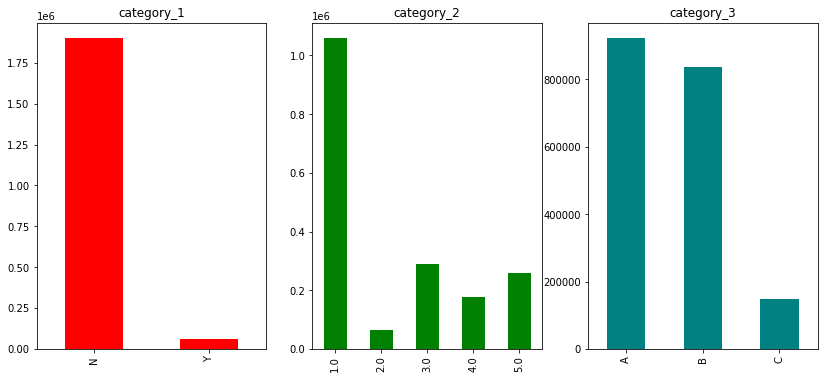

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (14, 6))
new_merchant['category_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='red', title='category_1')
new_merchant['category_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='green', title='category_2')
new_merchant['category_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='teal', title='category_3')

All the three are categorical features, category_1 takes two values Y or N

category_2 takes five values from 1 to 5

category_3 takes three values A, B or C

One hot encoding should be done.

#### Correlation using VIF

In [ ]:
d = {'A':1,'B':2,'C':3}
x = {'Y':1,'N':0}

cols = ['authorized_flag','category_3','month_lag','purchase_amount','state_id','subsector_id', 'category_2','installments']
n = new_merchant[cols]
n['category_3'] = n['category_3'].map(d)
n['authorized_flag'] = n['authorized_flag'].map(x)

n = n.dropna()

In [ ]:
print(new_merchant.columns)

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(n.iloc[:,:].values, i) for i in range(n.shape[1])]
vif["features"] = n.columns
vif

,VIF Factor,features
0,31.880336,authorized_flag
1,1.493133,category_3
2,1.000173,month_lag
3,1.067400,purchase_amount
4,1.021572,state_id
5,1.010237,subsector_id
6,1.021653,category_2
7,1.528132,installments


The value for the authorized flag is somewhat higher, it is around 32 which indicates possible correlation. 
So this variable needs further investigation.

Other than the authorized flag the remaining variables doesn't look correlated. They are well under 2.


## **OBSERVATION**

1) There are a total of 5 data files. train, test, new_merchant, merchant and historical transactions.

2) The features which are inherently in the train set is not much useful as the box plot of these features against the target variables. So we need to engineer some new features.

3) Plotting the distribution of the train data against the test data shows that both have the same distribution. So there's no need for time based splitting.

4) Except for the train and test data there are missing values in the remaining data. So it need to be filled with apposite method before modelling.

5) Since there are time feature like purchase date we can create new features which are extract of that feature. Like extracting days, months, weekend or check whether it is a holiday etcetera.

6) There are a lot of categorical features comparing to the numerical ones. The categorical features should be one hot encoded.

7) The features in the merchant dataset is highly correlated as we can see from the VIF scores. We can also see that after removing the correlated variables and again calculating the VIF score we can see reduce VIF scores.

8) In the historical transactions data theres is this feature called authorized_flag count which indicates whether the transaction is authorized or not. What we can do is we can separate our datasets as authorized or not and create features separately.

9) In the target variable even though it looks normally distributed around a central value there few outliers in the data. However we cannot simply drop those data because those outliers may present in the test data also and we don't know that.

10) So what we can do is that we can create a new column whether it is outlier or not and let the model decide how to handle it.

11) Another thing we could do is create separate model for predicting outliers and the normal data.

## Imputing using ML models

### new_merchant.csv

partly inspired from: https://medium.com/towards-artificial-intelligence/handling-missing-data-for-advanced-machine-learning-b6eb89050357

In [57]:
new_merchant = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/new_merchant_transactions.csv',parse_dates=["purchase_date"])
new_merchant = reduce_mem_usage(new_merchant)

Mem. usage decreased to 114.20 Mb (45.5% reduction)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

a = pd.DataFrame()
a['card_id'] = new_merchant['card_id']
a['merchant_id'] = new_merchant['merchant_id']
a['purchase_date'] = new_merchant['purchase_date']

new_merchant.drop(['card_id', 'merchant_id', 'purchase_date'], axis=1, inplace=True)
gc.collect()

feat = new_merchant.columns
cols = ['category_2', 'category_3']

#label encode the variables
new_merchant = lab_enc(new_merchant, ['authorized_flag','category_1'], prefix='new_merchant')

#list to hold the null values
no_nan = []

#select only columns which doesn't have any null values
for c in feat:
  if c not in cols:
    no_nan.append(c)

#create a test set by selecting only rows which are having null values
test = new_merchant[new_merchant['category_2'].isna()]

#create train set by selecting rows which doesn't have any null values
train = new_merchant.dropna()

#label encode the category 3 variables before feeding it to the model
d = {'A':1, 'B':2, 'C':3}
train['category_3'] = train['category_3'].map(d)
test['category_3'] = test['category_3'].map(d)

#fit the classifier to the train data
clf_cat2 = LogisticRegression()
clf_cat2.fit(train[no_nan], train['category_2'])
pickle.dump(clf_cat2, open('clf_cat2.sav', 'wb'))

#make prediction only for the rows with null value
new_merchant.loc[new_merchant['category_2'].isna(), 'category_2'] = clf_cat2.predict(test[no_nan])

test = new_merchant[new_merchant['category_3'].isna()]
train = new_merchant.dropna()

clf_cat3 = LogisticRegression()
clf_cat3.fit(train[no_nan], train['category_3'])
pickle.dump(clf_cat3, open('clf_cat3.sav', 'wb'))

new_merchant.loc[new_merchant['category_3'].isna(), 'category_3'] = clf_cat3.predict(test[no_nan])

In [ ]:
new_merchant.isna().sum()

authorized_flag         0
city_id                 0
category_1              0
installments            0
category_3              0
merchant_category_id    0
month_lag               0
purchase_amount         0
category_2              0
state_id                0
subsector_id            0
dtype: int64

In [ ]:
new_merchant['card_id'] = a['card_id']
new_merchant['merchant_id'] = a['merchant_id']
new_merchant['purchase_date'] = a['purchase_date']

In [ ]:
new_merchant.to_csv('new_merch_fill_na.csv')
!cp new_merch_fill_na.csv "/content/drive/My Drive/Colab Notebooks/ELO"

In [73]:
del a, new_merchant;gc.collect()

123

### historical transac

In [6]:
ht           = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/historical_transactions.csv',parse_dates=['purchase_date'])
ht           = reduce_mem_usage(ht)

Mem. usage decreased to 1749.11 Mb (43.7% reduction)


In [ ]:
ht.isna().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

a = pd.DataFrame()
a['card_id'] = ht['card_id']
a['merchant_id'] = ht['merchant_id']
a['purchase_date'] = ht['purchase_date']

ht.drop(['card_id', 'merchant_id', 'purchase_date'], axis=1, inplace=True)
gc.collect()

feat = ht.columns
cols = ['category_2', 'category_3']

#laabel encode the variables
ht = lab_enc(ht, ['authorized_flag','category_1'], prefix='ht')

#list to hold the null values
no_nan = []

#select only columns which doesn't have any null values
for c in feat:
  if c not in cols:
    no_nan.append(c)

#create a test set by selecting only rows which are having null values
test = ht[ht['category_2'].isna()]

#create train set by selecting rows which doesn't have any null values
train = ht.dropna()

#label encode the category 3 variables before feeding it to the model
d = {'A':1, 'B':2, 'C':3}
train['category_3'] = train['category_3'].map(d)
test['category_3'] = test['category_3'].map(d)

#fit the classifier to the train data
ht_clf_cat2 = LogisticRegression()
ht_clf_cat2.fit(train[no_nan], train['category_2'])
pickle.dump(ht_clf_cat2, open('ht_clf_cat2.sav', 'wb'))

#make prediction only for the rows with null value
ht.loc[ht['category_2'].isna(), 'category_2'] = ht_clf_cat2.predict(test[no_nan])

#del clf;gc.collect()

CPU times: user 27min 48s, sys: 43.1 s, total: 28min 32s
Wall time: 27min 14s


In [ ]:
test = ht[ht['category_3'].isna()]
train = ht.dropna()

ht_clf_cat3 = LogisticRegression()
ht_clf_cat3.fit(train[no_nan], train['category_3'])
pickle.dump(ht_clf_cat3, open('ht_clf_cat3.sav', 'wb'))

ht.loc[ht['category_3'].isna(), 'category_3'] = ht_clf_cat3.predict(test[no_nan])

In [ ]:
ht.isna().sum()

authorized_flag         0
city_id                 0
category_1              0
installments            0
category_3              0
merchant_category_id    0
month_lag               0
purchase_amount         0
category_2              0
state_id                0
subsector_id            0
dtype: int64

In [ ]:
ht['card_id'] = a['card_id']
ht['merchant_id'] = a['merchant_id']
ht['purchase_date'] = a['purchase_date']

In [ ]:
ht.to_csv('ht_fill_na.csv')
!cp ht_fill_na.csv "/content/drive/My Drive/Colab Notebooks/ELO"

### merchant.csv

In [15]:
merchant = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/merchants.csv')
merchant = reduce_mem_usage(merchant)

Mem. usage decreased to 30.32 Mb (46.0% reduction)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#a = merchant.copy()
merchant = merchant[merchant['avg_purchases_lag3']!=np.inf]

tmp = pd.DataFrame()
tmp['merchant_id'] = merchant['merchant_id']
tmp['category_2'] = merchant['category_2']

merchant.drop(['merchant_id', 'category_2'], axis=1, inplace=True)

merchant = lab_enc(merchant, ['category_4','category_1','most_recent_sales_range','most_recent_purchases_range'], prefix='merchant')

feat = merchant.columns
cols = ['avg_sales_lag3','avg_sales_lag6','avg_sales_lag12']
no_nan = []

for c in feat:
  if c not in cols:
    no_nan.append(c)

test = merchant[merchant['avg_sales_lag3'].isna()]
train = merchant.dropna()

merch_clf_knn = KNeighborsRegressor(n_neighbors=5)
merch_clf_knn.fit(train[no_nan], train['avg_sales_lag3'])
merchant.loc[merchant['avg_sales_lag3'].isna(), 'avg_sales_lag3'] = merch_clf_knn.predict(test[no_nan])
pickle.dump(merch_clf_knn, open('merch_clf_knn.sav', 'wb'))

test = merchant[merchant['avg_sales_lag6'].isna()]
train = merchant.dropna()

merch_clf2_knn = KNeighborsRegressor(n_neighbors=5)
merch_clf2_knn.fit(train[no_nan], train['avg_sales_lag6'])
merchant.loc[merchant['avg_sales_lag6'].isna(), 'avg_sales_lag6'] = merch_clf2_knn.predict(test[no_nan])
pickle.dump(merch_clf2_knn, open('merch_clf2_knn.sav', 'wb'))

test = merchant[merchant['avg_sales_lag12'].isna()]
train = merchant.dropna()

merch_clf3_knn = KNeighborsRegressor(n_neighbors=5)
merch_clf3_knn.fit(train[no_nan], train['avg_sales_lag12'])
merchant.loc[merchant['avg_sales_lag12'].isna(), 'avg_sales_lag12'] = merch_clf3_knn.predict(test[no_nan])
pickle.dump(merch_clf3_knn, open('merch_clf3_knn.sav', 'wb'))

merchant['category_2'] = tmp['category_2']

merchant.isna().sum()

merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                     0
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                     0
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                    0
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11886
dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

feat = merchant.columns
cols = ['category_2']
no_nan = []

for c in feat:
  if c not in cols:
    no_nan.append(c)

test = merchant[merchant['category_2'].isna()]
train = merchant.dropna()

merch_clf_cat2 = LogisticRegression()
merch_clf_cat2.fit(train[no_nan], train['category_2'])
merchant.loc[merchant['category_2'].isna(), 'category_2'] = merch_clf_cat2.predict(test[no_nan])
pickle.dump(merch_clf_cat2, open('merch_clf_cat2.sav', 'wb'))

In [ ]:
merchant['merchant_id'] = tmp['merchant_id']

In [ ]:
merchant.isna().sum()

merchant_group_id              0
merchant_category_id           0
subsector_id                   0
numerical_1                    0
numerical_2                    0
category_1                     0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             0
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             0
active_months_lag6             0
avg_sales_lag12                0
avg_purchases_lag12            0
active_months_lag12            0
category_4                     0
city_id                        0
state_id                       0
category_2                     0
merchant_id                    0
dtype: int64

In [ ]:
merchant.to_csv('merch_fill_na.csv')
!cp merch_fill_na.csv "/content/drive/My Drive/Colab Notebooks/ELO"

## Pre-processing

In [ ]:
new_merchant = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/new_merch_fill_na.csv')
new_merchant = reduce_mem_usage(new_merchant)

ht = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/ht_fill_na.csv')
ht = reduce_mem_usage(ht)

Mem. usage decreased to 95.48 Mb (57.5% reduction)
Mem. usage decreased to 1471.48 Mb (55.8% reduction)


In [ ]:
#label encoding the features
ht = lab_enc(ht, ['category_3'], prefix='ht')
new_merchant = lab_enc(new_merchant, ['category_3'], prefix='new_merchant')

gc.collect()

0

In [ ]:
# historical transactions one hot encoding
# tried with pandas get_dummies but as I am working in colab the kernel is crashing stating memory exhausted

mont = [0,-1,-2,-3,-4,-5,-6]
cat_2 = [1.,2.,3.,4.,5.]
cat_3 = [0,1,2,3]

for val in mont:
  ht['month_lag={}'.format(val)] = (ht['month_lag'] == val).astype(int)

for val in cat_2:
  ht['category_2={}'.format(int(val))] = (ht['category_2'] == val).astype(int)

for val in cat_3:
  ht['category_3={}'.format(int(val))] = (ht['category_3'] == val).astype(int)
gc.collect()

60

In [ ]:
# new merchant one hot encoding
cat_2 = [1.,2.,3.,4.,5.]
cat_3 = [0,1,2,3]
mont = [1,2]

for val in mont:
  new_merchant['month_lag={}'.format(val)] = (new_merchant['month_lag'] == val).astype(int)

for val in cat_2:
  new_merchant['category_2={}'.format(int(val))] = (new_merchant['category_2'] == val).astype(int)

for val in cat_3:
  new_merchant['category_3={}'.format(int(val))] = (new_merchant['category_3'] == val).astype(int)
gc.collect()

60

In [ ]:
#creating a reference month
ht['purchase_month'] = ht['purchase_date'].astype(str)
#for reference month keep the date constant and subtract the month lag from the month field
#inspired from a kaggle kernel(unable to find the discussion thread)
ht['reference_month'] = pd.to_datetime(ht['purchase_month'].apply(lambda x: x[:7] + '-28')) - \
                                       ht['month_lag'].apply(lambda x: np.timedelta64(x, 'M'));gc.collect()

0

In [ ]:
#extract only month from the reference month column
ht['reference_month'] = [x[:7] for x in ht['reference_month'].astype(str)]
del ht['purchase_month'];gc.collect()

In [ ]:
#do the same with the new_merchant data
new_merchant['reference_month'] = (pd.to_datetime(pd.DatetimeIndex(new_merchant['purchase_date']).date) - \
                                   new_merchant['month_lag'].apply(lambda x: np.timedelta64(x, 'M')))
new_merchant['reference_month'] = [x[:7] for x in new_merchant['reference_month'].astype(str)]

In [ ]:
#save the file
new_merchant.to_csv('new_merchant_processed_fill_na.csv', index=False)
#!cp new_merchant_processed.csv "/content/drive/My Drive/Colab Notebooks/ELO"
ht.to_csv('ht_processed_fill_na.csv', index=False)
#!cp ht_processed.csv "/content/drive/My Drive/Colab Notebooks/ELO"

# FEATURE ENGINEERING

Creating features based on the time features based on the historical transactiond and new merchants.

We'll create features grouped by the card_id as the card_id has some duplicate values and there are no null values.

In [ ]:
#loading the new_merchant dataset
new = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/new_merch_fill_na_processed.csv')
new_merchant_feats = pd.DataFrame(new.groupby(['card_id']).size()).reset_index()
new_merchant_feats.columns = ['card_id', 'new_transac_count']
#the purchase amount given to us is normalized. It does not make any sense if we look at it.
#Credits to the user radar he somehow deanonymize the data and give the below formula to transform the purchase
#amount which will make much sense
# kaggle.com/raddar/towards-de-anonymizing-the-data-some-insights 
new['purchase_amount'] = np.round(new['purchase_amount'] / 0.00150265118 + 497.06, 2)

#loading the historical transactions data and group it by the column card_id
ht = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/ht_processed_fill_na.csv')
historical_trans_features = pd.DataFrame(ht.groupby(['card_id']).size()).reset_index()
historical_trans_features.columns = ['card_id', 'hist_transac_count']
#transforming the purchase amount
ht['purchase_amount'] = np.round(ht['purchase_amount'] / 0.00150265118 + 497.06, 2)

In the following code snippet we will find the nunique value. What nunique will return is the number of unique observations in the columns.

The columns in which the operation is going to be performed is denoted using the cols variable. 

In [ ]:
#find the value nuniq for the cols specified
cols = ['city_id', 'state_id', 'merchant_category_id', 'subsector_id', 'merchant_id']
new_merchant_feats = find_single_val(new_merchant_feats, new, col=cols, grpby='card_id',\
                            op=['nunique'], prefix='new_transac', use_col=True)

#find the value nuniq for the cols specified
cols = ['city_id', 'state_id', 'merchant_category_id', 'subsector_id', 'merchant_id']
historical_trans_features = find_single_val(historical_trans_features, new, col=cols, grpby='card_id',\
                            op=['nunique'], prefix='hist_transac', use_col=True)

Using the category_1 feature which takes binary value 1 or 0 we'll find the sum of this feature grouped by the card_id.

Once we calculate the sum of this feature what we have at hand is the number of 1's occuring. To find the number of 0's we'll subtract the sum from the total transaction count.

In [ ]:
#find the val sum of 1 for the cols specified
# since this is a binary feat (0 or 1)subtracting from the tot count to find the count of 0
new_merchant_feats = find_single_val(new_merchant_feats, new, col=['category_1'], grpby='card_id',\
                            op=['sum'], prefix='new_transac', use_col=True)
new_merchant_feats['new_transac_category_0_sum'] = new_merchant_feats['new_transac_count'].values - new_merchant_feats.iloc[:, -1].values

#find the val sum of 1 for the cols specified
# since this is a binary feat (0 or 1)subtracting from the tot count to find the count of 0
historical_trans_features = find_single_val(historical_trans_features, new, col=['category_1'], grpby='card_id',\
                            op=['sum'], prefix='hist_transac', use_col=True)
historical_trans_features['hist_transac_category_0_sum'] = historical_trans_features['hist_transac_count'].values - \
                                                           historical_trans_features.iloc[:, -1].values

Using the feature we just created we'll find other numerical features like calculating the mean and standard deviation, min, max and skew.

In [ ]:
#find the val mean and std for the specified col
new_merchant_feats = find_single_val(new_merchant_feats, new, col=['category_1'], grpby='card_id',\
                            op=['mean','std'], prefix='new_transac', use_col=True)

#aggregate feturess like mean, sum, max, min for the col specified
new_merchant_feats = s_agg(new_merchant_feats, new, col='installments', grpby='card_id', \
                           op=['mean', 'sum', 'max', 'min', 'std', 'skew'], prefix='new_transac_')

#find the val mean and std for the specified col
historical_trans_features = find_single_val(historical_trans_features, new, col=['category_1'], grpby='card_id',\
                                            op=['mean','std'], prefix='hist_transac', use_col=True)

#aggregate feturess like mean, sum, max, min for the col specified
historical_trans_features = s_agg(historical_trans_features, new, col='installments', grpby='card_id', \
                                  op=['mean', 'sum', 'max', 'min', 'std', 'skew'], \
                  prefix='hist_transac')

The feature category_2 takes 5 values. This feature is one hot encoded. So what we'll do is we'll find the sum and mean for each of the one hot encoded columns.

The feature category_2=1 indicates that the category_2 takes value 1 like that.

The same goes for the category_3 also

In [ ]:
#find val mean and sum for the col specified
cols = ['category_2=1', 'category_2=2', 'category_2=3', 'category_2=4', 'category_2=5',
        'category_3=0', 'category_3=1', 'category_3=2', 'category_3=3']
new_merchant_feats = find_single_val(new_merchant_feats, new, col=cols, grpby='card_id',\
                                     op=['mean','sum'], prefix='new_transac', use_col=True)

#find val mean and sum for the col specified
cols = ['category_2=1', 'category_2=2', 'category_2=3', 'category_2=4', 'category_2=5',
        'category_3=0', 'category_3=1', 'category_3=2', 'category_3=3']
historical_trans_features = find_single_val(historical_trans_features, new, col=cols, grpby='card_id',\
                                            op=['mean','sum'], prefix='new_transac', use_col=True)

In the following snippet we'll create new features based off of the month_lag column which is inherently present in the given data. For that first we'll group the data by card_id.

Once the data is grouped then we'll calculate the values like sum, mean and standard deviation for the purchase amount column.

In the following we have calculated the above values for the purchase amount.

For the authorized flag feature we'll do the same as we did for the category_1 feature like finding sum and subtracting the sum from the total transaction count to get the sum of 0.

In [ ]:
grpby_lag = ['card_id', 'month_lag']
grpby_id  = ['card_id', 'merchant_id']
#get basic month stats
historical_trans_features = get_monthlag_stat(historical_trans_features, new, grpby=grpby_lag, op='count', \
                                           col='purchase_amount', prefix='hist_transac', name=['count_std','count_max'])

#authorized column mean and count features
historical_trans_features = find_single_val(historical_trans_features, new, col=['authorized_flag'], grpby='card_id',\
                                            op=['sum', 'mean'], prefix='hist_transac', use_col=True)
#get authorized column denied count by subtracting authorized colum sum from total transaction count
historical_trans_features['hist_transac_denied_count'] = historical_trans_features['hist_transac_count'].values - \
                                                         historical_trans_features.iloc[:, -1].values

#find mean of the count of the transac for merchant id
historical_trans_features['hist_transac_merchant_id_count_mean'] = historical_trans_features['hist_transac_count'].values \
                                                                 / historical_trans_features['hist_transac_merchant_id_nunique'].values

#basic features from authorized column like max, ratio, std
historical_trans_features['hist_transac_merchant_count_max'] = ht.groupby(grpby_id).size().reset_index()
historical_trans_features['hist_transac_merchant_count_max'] = groupby(['card_id'])[0].max().values #tiup

#get basic month stats grouped by card_id and month_lag
new_merchant_feats = get_monthlag_stat(new_merchant_feats, new, grpby=grpby_lag, op='count', \
                                       col='purchase_amount', prefix='new_transac_', name=['count_std','count_max'])

Calculating simple ratios by dividing the already calculted values.


In [ ]:
historical_trans_features['hist_transac_merchant_ratio'] = historical_trans_features.iloc[:, -1].values \
                                                                      / historical_trans_features['hist_transac_count'].values
historical_trans_features['hist_transac_merchant_id_ratio'] = historical_trans_features.iloc[:, -2].values \
                                                                          / historical_trans_features['hist_transac_merchant_id_count_mean'].values
historical_trans_features['hist_transac_merchant_count_std'] = ht.groupby(['card_id', 'merchant_id']).size().reset_index().\
                                                               groupby(['card_id'])[0].std().values
#save the created features
historical_trans_features.to_csv('hist_transac_info_fill_na.csv')
new_merchant_feats.to_csv('new_merch_info_fillna.csv')

Amount

Once the data is loaded we'll group them by the card_id

Next we'll calculate simple statistics like min, max, mean, medan and std for the purchase amount column.

The transaction amount difference feature is the difference between the maximum and minimum purchase amount for each card_id

Then we'll find the difference between the purchase amount max and min for each card_id

In [ ]:
new = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/new_merchant_processed_fill_na.csv')
new_merchant_feats = pd.DataFrame(new.groupby(['card_id']).size()).reset_index()
new_merchant_feats.columns = ['card_id', 'new_transac_count']
#the purchase amount given to us is normalized. It does not make any sense if we look at it.
#Credits to the user radar he somehow deanonymize the data and give the below formula to transform the purchase
#amount which will make much sense
# kaggle.com/raddar/towards-de-anonymizing-the-data-some-insights 
new['purchase_amount'] = np.round(new['purchase_amount'] / 0.00150265118 + 497.06, 2)

ht = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/ht_processed_fill_na.csv')
historical_trans_features = pd.DataFrame(ht.groupby(['card_id']).size()).reset_index()
historical_trans_features.columns = ['card_id', 'hist_transac_count']
ht['purchase_amount'] = np.round(ht['purchase_amount'] / 0.00150265118 + 497.06, 2)

#crete agg features based on the purchase amount 
op = ['sum', 'mean', 'max', 'min', 'median', 'std', 'skew']
new_merchant_feats = s_agg(new_merchant_feats, new, op=op, prefix='new_transac_', col='purchase_amount', grpby='card_id')
#finding the difference between the maximum and minmum purchase amount
new_merchant_feats['new_transac_amount_diff'] = new_merchant_feats['new_transac_purchase_amount_max'].values - \
                                                new_merchant_feats['new_transac_purchase_amount_min'].values

#create basic agg features from the purchase amount column grouped by card id
op = ['sum', 'mean', 'max', 'min', 'median', 'std', 'skew']
historical_trans_features = s_agg(historical_trans_features, ht, op=op, prefix='hist_transac_', \
                   col='purchase_amount', grpby='card_id')
#finding the difference between the purchase amount max and min
historical_trans_features['hist_transac_amount_diff'] = historical_trans_features['hist_transac_purchase_amount_max'].values - \
                                        historical_trans_features['hist_transac_purchase_amount_min'].values

Calculating the monthlag features for the purchase amount. The month lag take two values 1 and 2 we are finding the sum for these two month lags.

Finally we'll calculate the ratio by dividing the purchase amount for both the monthlags.

In [ ]:
#basic month features
new_merchant_feats = get_monthlag_stat(new_merchant_feats, new, grpby=['card_id','month_lag'], op='sum',\
                                        col='purchase_amount', prefix='new_transac_', \
                                        name=['1_amount','2_amount'])
# dividing monthlag2 by 1 to find the ratio
new_merchant_feats['new_transac_monthlag_ratio'] = (new_merchant_feats.iloc[:, -1] / new_merchant_feats.iloc[:, -2])\
                                                          .replace([np.inf, -np.inf], np.nan)
#create another feature by taking the log of the ratio
new_merchant_feats['new_transac_monthlag_log_ratio'] = np.log2(new_merchant_feats.iloc[:, -1])

The following feature successive aggregates is inspired  from a kaggle kernel.

what the below code snippet does is that it group the data twice by different column for each groupby and find basic aggregate values. 

First it will goup by card_id and the field1 for the second groupby it will group the data by card_id and the field2. We can mention the field1 and field2 in the method arguments. Then it will find the agg values like mean, min, max and std for the columns we have specified.

In [ ]:
#successive agg features
#create a temp DF ADD to hold the new features
add = successive_aggregates(ht, field1='category_1', field2='purchase_amount')
col = ['installments', 'city_id', 'merchant_category_id', 'merchant_id',\
       'subsector_id','category_2','category_3']

#for each column commpute the agg and merge with the temp DF
for c in col:
  add = add.merge(successive_aggregates(ht, c, 'purchase_amount'), \
            on=['card_id'], how='left')
#merge the temp DF with our feature set
new_merchant_feats = new_merchant_feats.merge(add, on=['card_id'], how='left')

#successive agg features
#create a temp DF ADD to hold the new features
add = successive_aggregates(new, 'category_1', 'purchase_amount')
col = ['installments', 'city_id', 'merchant_category_id', 'merchant_id',\
       'subsector_id','category_2','category_3']

#for each column commpute the agg and merge with the temp DF
for c in col:
  add = add.merge(successive_aggregates(new, c, 'purchase_amount'), \
            on=['card_id'], how='left')
#merge the temp DF with our feature set
historical_trans_features = historical_trans_features.merge(add, on=['card_id'], how='left')

#save the created features
new_merchant_feats.to_csv('new_merch_amount_fillna.csv', index=False)
historical_trans_features.to_csv('hist_transac_amount_fill_na.csv', index=False)

Time

Loading the dataset new merchant and historical transactions and group by card_id

In [ ]:
new = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/new_merchant_processed_fill_na.csv')
new_merchant_feats = pd.DataFrame(new.groupby(['card_id']).size()).reset_index();gc.collect()
new_merchant_feats.columns = ['card_id', 'new_transac_count']

ht = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ELO/ht_processed_fill_na.csv')
historical_trans_features = pd.DataFrame(ht.groupby(['card_id']).size()).reset_index();gc.collect()
historical_trans_features.columns = ['card_id', 'hist_transac_count']
ht['purchase_amount'] = np.round(ht['purchase_amount'] / 0.00150265118 + 497.06, 2)

Finding simple stats values mean, std and max for the column monthlag.

Then based on these newly created features create feat like difference and ratio by dividing the values


In [ ]:
#agg feat like mean, std, max for the column monthlag grouped by card_id 
new_merchant_feats = s_agg(new_merchant_feats, new, op=['mean', 'std', 'max'], prefix='new_transac_', grpby='card_id', col='month_lag')

#get agg feats like min, mean, std for the col specified
historical_trans_features = s_agg(historical_trans_features, ht, ['nunique', 'mean', 'std', 'min', 'skew'], 'hist_transac_', 'card_id', 'month_lag')

#get values like min and max values from the col purchase_date
new_merchant_feats = find_single_val(new_merchant_feats, new, col=['purchase_date'], grpby='card_id', op=['max','min'], prefix='new_transac', use_col=True)
#based on the min and max find difference and ratio
new_merchant_feats['purchase_date_diff'] = (pd.to_datetime(new_merchant_feats.iloc[:, -2]) - 
                                            pd.to_datetime(new_merchant_feats.iloc[:, -1])).dt.days.values
new_merchant_feats['purchase_count_ratio'] = new_merchant_feats['new_transac_count'].values / (1. + new_merchant_feats.iloc[:, -1].values)

#get values like min and max values from the col purchase_date
historical_trans_features = find_single_val(historical_trans_features, ht, col=['purchase_date'], grpby='card_id',\
                             op=['max','min'], prefix='hist_transac', use_col=True)
#create feats like difference and ratio between the first and last purchases made for a card_id
historical_trans_features['hist_purchase_date_diff'] = (pd.to_datetime(historical_trans_features.iloc[:, -2]) - \
                                                        pd.to_datetime(historical_trans_features.iloc[:, -1])).dt.days.values
historical_trans_features['hist_purchase_count_ratio'] = historical_trans_features['hist_transac_count'].values / (1. + historical_trans_features.iloc[:, -1].values)

Now we'll create features based on whether a particular day is a weekend or not.

We'll mark a day as weekend if it is either saturday or sunday.

Since is_weekend is a numeric feature now we can find values like sum, mean etcetera. This will tells us that how many times a particular card_id made purchase during weekends.

Next we'll create a feature month difference calculated by subtracting the purchase date from the reference month.

Once we have the feature month_diff then we can find sum and mean of the feat. Since the date has a dtype of timedelta we cannot directly calculate the month difference as the timedelta has no attribute to calc month. We first need to find the days then we can divide it by 30 to get the month value.

In [ ]:
reference_date = '2018-12-31'
#features based on if the particular day is a weekend
new['is_weekend'] = (pd.DatetimeIndex(new['purchase_date']).dayofweek)
#>5 to check whether the day is sat or sunday if it is then assign a val 1 else 0
new['is_weekend'] = new['is_weekend'].apply(lambda x: 1 if x >= 5 else 0).values
#get the values of mean and sum grouped by card_id for the weekend feature
new_merchant_feats = find_single_val(new_merchant_feats, new, col=['is_weekend'], grpby='card_id', name='purchase_weekend_count',\
                            op=['sum'], prefix='new_transac')
new_merchant_feats = find_single_val(new_merchant_feats, new, col=['is_weekend'], grpby='card_id', name='purchase_weekend_mean',\
                            op=['mean'], prefix='new_transac')

#features based on if the particular day is a weekend
#day is termed as weekend if it is either sat or sunday
ht['is_weekend'] = (pd.DatetimeIndex(ht['purchase_date']).dayofweek)
#>5 to check whether the day is sat or sunday if it is then assign a val 1 else 0
ht['is_weekend'] = ht['is_weekend'].apply(lambda x: 1 if x >= 5 else 0).values
#get the values of mean and sum grouped by card_id for the weekend feature
# find purchases made in weekend sum
historical_trans_features = find_single_val(historical_trans_features, ht, col=['is_weekend'], grpby='card_id', \
                                            name='purchase_weekend_count', op=['sum'], prefix='hist_transac')
#find purchases made in weekend mean
historical_trans_features = find_single_val(historical_trans_features, ht, col=['is_weekend'], grpby='card_id', \
                                            name='purchase_weekend_mean', op=['mean'], prefix='hist_transac')
historical_trans_features = historical_trans_features.merge(ht[['card_id', 'reference_month']]\
.drop_duplicates(), on='card_id', how='left')
historical_trans_features['reference_month'] = pd.to_datetime(historical_trans_features['reference_month'])

purchase_date = pd.to_datetime(new['purchase_date'])
reference_date = pd.to_datetime(reference_date)
# We need to find the difference in days then we can divide by 30 to convert it into months.
# as timedelta doesn't have attribute to directly get months.
new['month_diff'] = (reference_date - purchase_date).dt.days
new['month_diff'] = new['month_diff'] // 30 + new['month_lag']
new['month_diff'].head()
new_merchant_feats = find_single_val(new_merchant_feats, new, col=['month_diff'], grpby='card_id', \
                                     name='new_month_diff_mean', op=['mean'])

purchase_date = pd.to_datetime(ht['purchase_date'])
reference_date = pd.to_datetime(reference_date)
# We need to find the difference in days then we can divide by 30 to convert it into months.
# as timedelta doesn't have attribute to directly get months.
ht['month_diff'] = (reference_date - purchase_date).dt.days
ht['month_diff'] = ht['month_diff'] // 30 + ht['month_lag']
ht['month_diff'].head()
historical_trans_features = s_agg(historical_trans_features, ht, op=['mean', 'std', 'min', 'max'], \
                   col='month_diff', grpby='card_id', prefix='hist_')

calculating the month ratio for the column purchase amount. Once we have the month ration feature we'll perform aggregate operations like finding  mean, std, min, max based off of the month ratio feature.

The amount month ratio is calculated by dividing the purchase amount by the month difference feature we created in the last part.

The 1 is added in the denominator to nullify the division by zero error.

In [ ]:
new['amount_month_ratio'] = new['purchase_amount'].values / (1. + new['month_diff'].values)
#agg feat based on the cols created in the last part
new_merchant_feats = s_agg(new_merchant_feats, new, op=['mean', 'std', 'min', 'max', 'skew'], \
                           prefix='new_transac_', grpby='card_id', col='duration')
new_merchant_feats = s_agg(new_merchant_feats, new, op=['mean', 'std', 'min', 'max', 'skew'], \
                           prefix='new_transac_', grpby='card_id', col='amount_month_ratio')
#find sum and mean of the col monthlag col grouped by card_id
new_merchant_feats = find_single_val(new_merchant_feats, new, col=['month_lag=1', 'month_lag=2'], grpby='card_id',\
                            op=['sum','mean'], prefix='new_transac', use_col=True)

ht['amount_month_ratio'] = ht['purchase_amount'].values / (1. + ht['month_diff'].values)
#agg feat based on the cols created in the last part
historical_trans_features = s_agg(historical_trans_features, ht, ['mean', 'std', 'min', 'max', 'skew'], \
                   prefix='hist_transac_', grpby='card_id', col='duration')
historical_trans_features = s_agg(historical_trans_features, ht, ['mean', 'std', 'min', 'max', 'skew'], \
                   prefix='hist_transac_', grpby='card_id', col='amount_month_ratio')
#find sum and mean of the col monthlag col grouped by card_id
historical_trans_features = find_single_val(historical_trans_features, ht, col=['month_lag=0', 'month_lag=-1', 'month_lag=-2'],\
                                            grpby='card_id', op=['sum','mean'], prefix='hist_transac', use_col=True)

In the below cell we'll extract the week, day and hour from the column purchase_date.

Once we have the extracted values from the date column now we can create basic aggregates like mean, min and max for all the three features.

Since we are grouping by card_id this feature will tells us information about each card what is the mean purchase hour, at which week of the year they made a purchase etcetera.

In [ ]:
#extract week, day, and hour from the date column then
#create agg features like mean, min, max for each of the
#features separately
ht['week'] = pd.DatetimeIndex(ht['purchase_date']).week.values
ht['day'] = pd.DatetimeIndex(ht['purchase_date']).dayofweek.values
ht['hour'] = pd.DatetimeIndex(ht['purchase_date']).hour.values
#get aggregate values from the cols week, day and hour
gc.collect()
historical_trans_features = s_agg(historical_trans_features, ht, op=['nunique', 'mean', 'min', 'max'], \
                   col='week', grpby='card_id', prefix='hist_transac')
historical_trans_features = s_agg(historical_trans_features, ht, op=['nunique', 'mean', 'min', 'max'], \
                   col='day', grpby='card_id', prefix='hist_transac')
historical_trans_features = s_agg(historical_trans_features, ht, op=['nunique', 'mean', 'min', 'max'], \
                   col='hour', grpby='card_id', prefix='hist_transac')

In the following code snippet we are calculating the difference in days, seconds, minutes between the current and previous purchase for a particular card_id.

To do that we'll first group the data by card_id and shift the purchase date value. Then we'll find the difference between the days, seconds, minutes etcetera. This feature will gives us information about the difference in days between purchases for each card_id.

Once we have these numerical features then we can apply the functin s_agg to calculate the aggregate values like mean, std etcetera.

In [ ]:
#calculating the ratio between the two monthlags
new_merchant_feats['new_transac_month_lag=1_2_ratio'] = new_merchant_feats['new_transac_month_lag=1_sum'].values \
                                                        / (1. + new_merchant_feats['new_transac_month_lag=2_sum'].values)
#get basic time feat and create agg features based on the created cols
new = get_basic_time_feat(new, 'card_id', 'purchase_date', 2)
new_merchant_feats = s_agg(new_merchant_feats, new, op=['mean', 'std', 'max', 'min'], prefix='new_transac_', \
                           grpby='card_id', col='purchase_date_diff_1_seconds')
new_merchant_feats = s_agg(new_merchant_feats, new, op=['mean', 'std', 'max', 'min'], prefix='new_transac_', \
                           grpby='card_id', col='purchase_date_diff_1_days')
new_merchant_feats = s_agg(new_merchant_feats, new, op=['mean', 'std', 'max', 'min'], prefix='new_transac_', \
                           grpby='card_id', col='purchase_date_diff_1_hours')
#get basic time feat and create agg features based on the created cols
new_merchant_feats = s_agg(new_merchant_feats, new, op=['mean', 'std', 'max', 'min'], prefix='new_transac_', \
                           grpby='card_id', col='purchase_date_diff_2_seconds')
new_merchant_feats = s_agg(new_merchant_feats, new, op=['mean', 'std', 'max', 'min'], prefix='new_transac_', \
                           grpby='card_id', col='purchase_date_diff_2_days')
new_merchant_feats = s_agg(new_merchant_feats, new, op=['mean', 'std', 'max', 'min'], prefix='new_transac_', \
                           grpby='card_id', col='purchase_date_diff_2_hours')

based on the features created above now find values like ratio, sum etcetera

In [ ]:
#find the ratio between the monthlag cols
historical_trans_features['hist_transac_monthlag_0_-1_ratio'] = historical_trans_features.iloc[:, -6].values \
                                                              / (1. + historical_trans_features.iloc[:, -4].values)
historical_trans_features['hist_transac_monthlag_0_-2_ratio'] = historical_trans_features.iloc[:, -7].values \
                                                              / (1. + historical_trans_features.iloc[:, -3].values)
#create a feature of the sum of all the three monthlag sum
#crete a temp dataframe which holds the three cols
col = ['hist_transac_month_lag=0_sum', 'hist_transac_month_lag=-1_sum', 'hist_transac_month_lag=-2_sum']
tmp = historical_trans_features[col]
#perform sum operation over the cols
historical_trans_features['hist_transac_3mon_sum'] = tmp.sum(axis=1)
del tmp;gc.collect()
historical_trans_features['hist_transac_3mon_ratio'] = historical_trans_features.iloc[:, -1].values \
                                                      / (1. + historical_trans_features['hist_transac_count'].values)

like we created new features by shifting the values of the purchase date for the new merchants data we are gonna do the same for the historical transactions as well

Sort the purchase date and shift the values of the purchase date column.

Then find the difference between the seconds, days etcetera. This will give us the diffrence between the last and current purchase date. 

Once we have the new columns of difference in purchase date based on days, minutes and seconds we can now perform operations like min, max, mean on the columns to create new aggregate features.

In [ ]:
#if it gives an error use ht['purchase_date'] = pd.to_datetime(ht['purchase_date'])
ht = ht.sort_values('purchase_date')
#get basic time feat and create agg features based on the created cols
ht = get_basic_time_feat(ht, 'card_id', 'purchase_date', 1)
#get basic time feat and create agg features based on the created cols
historical_trans_features = s_agg(historical_trans_features, ht, op=['mean', 'std', 'max', 'min'], prefix='hist_transac_', \
                                  grpby='card_id', col='purchase_date_diff_1_seconds')
historical_trans_features = s_agg(historical_trans_features, ht, op=['mean', 'std', 'max', 'min'], prefix='hist_transac_', \
                                  grpby='card_id', col='purchase_date_diff_1_days')
historical_trans_features = s_agg(historical_trans_features, ht, op=['mean', 'std', 'max', 'min'], prefix='hist_transac_', \
                                  grpby='card_id', col='purchase_date_diff_1_hours')

In the following cell we will create influential days features.

What the below code does is that it will find whether a purchase is made 100 days before a festival. If it is so then it will be consider as an influential day.

Based on this feature now we'll create new features by finding basic stats like finding the mean for each of the holiday columns like christmas, fathers day etcetera.

In [ ]:
#create influential day features. If a purchase is made withing 100 days
#before or after a festival then it is called as influential days.
holiday = ['ChristmasDay_2017', 'FathersDay_2017', 'ChildrenDay_2017', 'BlackFriday_2017', 'ValentineDay_2017', 'MothersDay_2018']
date = ['2017-12-25', '2017-08-13', '2017-10-12', '2017-11-24', '2017-06-12', '2018-05-13']

for idx, day in enumerate(holiday):
  new = get_influential(new, day, date[idx])

#loop through all the created features and add it to the DataFrame
for c in holiday:
    gc.collect()
    new_merchant_feats['new_transac_{}_mean'.format(c)] = new.groupby(['card_id'])[c]\
                                                          .mean().values
new_merchant_feats.drop(['new_transac_count'], axis=1, inplace=True)

#create influential day features. If a purchase is made withing 100 days
#before or after a festival then it is called as influential days.
ht['purchase_date'] = pd.to_datetime(ht['purchase_date'])
for idx, day in enumerate(holiday):
  ht = get_influential(ht, day, date[idx])

#loop through all the created features and add it to the DataFrame
for c in holiday:
  gc.collect()
  historical_trans_features['hist_transac_{}_mean'.format(c)] = ht.groupby(['card_id'])[c]\
                                                                .mean().values
historical_trans_features.drop(['hist_transac_count'],axis=1,inplace=True)

#save the created features
new_merchant_feats.to_csv('new_merch_time_fillna.csv', index=False)
historical_trans_features.to_csv('hist_transac_time_fill_na.csv', index=False)

### FEATURES CREATED

**QUICK SUMMARY OF WHAT ARE ALL THE FEATURES CREATED:**

1) Creating features out of the date columns like adding whether it is a weekday, weekend, any special festive day or holiday, difference between dates, first and last registered dates. Could also engineer a feature like if a purchase is made within days before or after a festival then we can call it an influential day for making a purchase.

2) Transaction count (count)/success and failure count for each card_id (classified by authorized_flag)

3) category_1/ category_2/ category_3, are subjected to one-hot conversion and findding the mean and sum for each column separately.

4)Count/ max of each card_id under different month_lag

5)Sum/ mean/ max/ min/ median/ std of the transaction amount of each card_id

6) The statistical features like finding min, max, difference, average, percentiles of the time difference of the card_id transaction. 

7) Creating new features by feature interaction like summing two features, taking ratio etcetera.

8)The ratio of weekends and working days for each card_id transaction
Creating agg. features grouped by card_id and like finding the count of the purchases a particular card_id made during weekend etcetera and perform typical aggregate features like avg, min, max.

9) Features out of categorical features. For instance, there is this feature called authorized_flag takes two values (‘Y’ or ‘N’) which indicate whether a transaction is authorized or not. We can map the Y or N to 1 and 0 and we can find the sum of that column grouped by card_id. This will give us how many transactions are authorized for a particular card_id


## FEATURE SELECTION USING RECURSIVE FEATURE ELIMINATION

**Loading the dataset**

In [11]:
hist_transac_amount = pd.read_csv('/content/drive/My Drive/case study/upload 15mis/hist_transac_amount_fill_na.csv')
hist_transac_info = pd.read_csv('/content/drive/My Drive/case study/upload 15mis/hist_transac_info_fill_na.csv')
hist_transac_time = pd.read_csv('/content/drive/My Drive/case study/upload 15mis/hist_transac_time_fill_na.csv')

new_merch_amount = pd.read_csv('/content/drive/My Drive/case study/upload 15mis/new_merch_amount_fillna.csv')
new_merch_info = pd.read_csv('/content/drive/My Drive/case study/upload 15mis/new_merch_info_fillna.csv')
new_merch_time = pd.read_csv('/content/drive/My Drive/case study/upload 15mis/new_merch_time_fill_na.csv')

In [12]:
hist_transac_info.drop('Unnamed: 0', axis=1, inplace=True)
new_merch_info.drop('Unnamed: 0', axis=1, inplace=True)
new_merch_time.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
hist_feats = hist_transac_info.merge(hist_transac_amount, on='card_id', how='left')
hist_feats = hist_feats.merge(hist_transac_time, on='card_id', how='left')

In [14]:
del hist_transac_info, hist_transac_amount, hist_transac_time
gc.collect()

0

In [15]:
new_feats = new_merch_info.merge(new_merch_amount, on='card_id', how='left')
new_feats = new_feats.merge(new_merch_time, on='card_id', how='left')

In [16]:
del new_merch_info, new_merch_amount, new_merch_time
gc.collect()

0

In [17]:
train_df = pd.read_csv('/content/drive/My Drive/case study/upload 15mis/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/case study/upload 15mis/test.csv')

**merging the historical feat and new_merchant feat with the train and test data**

In [18]:
train_df = train_df.merge(hist_feats, on=['card_id'], how='left')
test_df = test_df.merge(hist_feats, on=['card_id'], how='left')

train_df = train_df.merge(new_feats, on=['card_id'], how='left')
test_df = test_df.merge(new_feats, on=['card_id'], how='left')

In [19]:
train_df['outliers'] = 0
train_df.loc[train_df['target'] < -30, 'outliers'] = 1

The train dataset has a date column first_active_month. We'll just create simple time features based on time like difference max etcetera

In [20]:
#creating basic time features from the train set
act_date = pd.to_datetime('2018-12-31')

for df in [train_df, test_df]:
    #converting the col ref_month an first_act_month to datetime type
    reference_month = pd.to_datetime(df['reference_month'])
    first_act_month = pd.to_datetime(df['first_active_month'])
    #extracting the year and month from the first_act_month
    df['year'] = pd.DatetimeIndex(df['first_active_month']).year.values
    df['month'] = pd.DatetimeIndex(df['first_active_month']).month.values
    df['month_diff'] = (reference_month - \
                                       first_act_month).dt.days.values
    
    df['elapsed_days'] = (act_date - reference_month).dt.days.values

    df['hist_purchase_active_diff'] = (pd.to_datetime(df['hist_transac_purchase_date_min'].astype(str)\
                                        .apply(lambda x: x[:7])) - first_act_month).dt.days.values
    df['hist_purchase_recency'] = (act_date - pd.to_datetime(df['hist_transac_purchase_date_max'])).dt.days.values
    df['new_purchase_recency'] = (act_date - pd.to_datetime(df['new_transac_purchase_date_max'])).dt.days.values
   

In [23]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,hist_transac_count_x,hist_transac_city_id_nunique,hist_transac_state_id_nunique,hist_transac_merchant_category_id_nunique,hist_transac_subsector_id_nunique,hist_transac_merchant_id_nunique,hist_transac_category_1_sum,hist_transac_category_0_sum,hist_transac_category_1_mean,hist_transac_category_1_std,hist_transacinstallments_mean,hist_transacinstallments_sum,hist_transacinstallments_max,hist_transacinstallments_min,hist_transacinstallments_std,hist_transacinstallments_skew,new_transac_category_2=1_mean_x,new_transac_category_2=1_sum_x,new_transac_category_2=2_mean_x,new_transac_category_2=2_sum_x,new_transac_category_2=3_mean_x,new_transac_category_2=3_sum_x,new_transac_category_2=4_mean_x,new_transac_category_2=4_sum_x,new_transac_category_2=5_mean_x,new_transac_category_2=5_sum_x,new_transac_category_3=0_mean_x,new_transac_category_3=0_sum_x,new_transac_category_3=1_mean_x,new_transac_category_3=1_sum_x,new_transac_category_3=2_mean_x,new_transac_category_3=2_sum_x,new_transac_category_3=3_mean_x,new_transac_category_3=3_sum_x,...,new_transac_month_lag=2_mean,new_transac_month_lag=1_2_ratio,new_transac_purchase_date_diff_1_seconds_mean,new_transac_purchase_date_diff_1_seconds_std,new_transac_purchase_date_diff_1_seconds_max,new_transac_purchase_date_diff_1_seconds_min,new_transac_purchase_date_diff_1_days_mean,new_transac_purchase_date_diff_1_days_std,new_transac_purchase_date_diff_1_days_max,new_transac_purchase_date_diff_1_days_min,new_transac_purchase_date_diff_1_hours_mean,new_transac_purchase_date_diff_1_hours_std,new_transac_purchase_date_diff_1_hours_max,new_transac_purchase_date_diff_1_hours_min,new_transac_purchase_date_diff_2_seconds_mean,new_transac_purchase_date_diff_2_seconds_std,new_transac_purchase_date_diff_2_seconds_max,new_transac_purchase_date_diff_2_seconds_min,new_transac_purchase_date_diff_2_days_mean,new_transac_purchase_date_diff_2_days_std,new_transac_purchase_date_diff_2_days_max,new_transac_purchase_date_diff_2_days_min,new_transac_purchase_date_diff_2_hours_mean,new_transac_purchase_date_diff_2_hours_std,new_transac_purchase_date_diff_2_hours_max,new_transac_purchase_date_diff_2_hours_min,new_transac_ChristmasDay_2017_mean,new_transac_FathersDay_2017_mean,new_transac_ChildrenDay_2017_mean,new_transac_BlackFriday_2017_mean,new_transac_ValentineDay_2017_mean,new_transac_MothersDay_2018_mean,outliers,year,month,month_diff,elapsed_days,hist_purchase_active_diff,hist_purchase_recency,new_purchase_recency
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,7,3,41,21,94,0,260,0.000000,0.000000,0.015385,4,1,0,0.123314,7.920770,0.988462,257,0.0,0,0.0,0,0.000000,0,0.011538,3,0.984615,256,0.015385,4,0.000000,0,0,0,...,0.478261,1.000000,215559.500000,2.056396e+05,778975.0,3996.0,1.954545,2.497185,9.0,0.0,59.363636,57.169377,216.0,1.0,4.442708e+05,2.744357e+05,1046801.0,17705.0,4.714286,3.180296,12.0,0.0,122.904762,76.208861,290.0,4.0,0.0,0.0,0.0,0.0,0.0,41.739130,0,6,8,245.0,333.0,0.0,308.0,245.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,9,3,57,24,142,31,319,0.088571,0.284531,1.551429,543,10,-1,1.510777,3.719427,1.000000,350,0.0,0,0.0,0,0.000000,0,0.000000,0,0.005714,2,0.788571,276,0.205714,72,0,0,...,0.500000,0.750000,977526.400000,1.547892e+06,3681153.0,16990.0,10.800000,17.824141,42.0,0.0,271.200000,429.871725,1022.0,4.0,2.154642e+06,1.803674e+06,3713948.0,346147.0,24.250000,20.597330,42.0,4.0,598.000000,501.043578,1031.0,96.0,0.0,0.0,0.0,0.0,0.0,56.833333,0,6,0,365.0,364.0,0.0,333.0,275.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,5,2,8,7,13,0,43,0.000000,0.000000,0.000000,0,0,0,0.000000,0.000000,0.093023,4,0.0,0,0.0,0,0.000000,0,0.906977,39,1.000000,43,0.000000,0,0.000000,0,0,0,...,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,14.000000,0,5,10,549.0,333.0,153.0,306.0,246.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,7,5,25,13,50,12,65,0.155844,0.365086,1.0

In [22]:
train_df = lab_enc(train_df, ['year', 'month'], prefix='train_df')
test_df = lab_enc(test_df, ['year', 'month'], prefix='test_df')

In [ ]:
train_cols = [c for c in train_df.columns if c not in ['hist_transac_purchase_date_max', 'hist_transac_purchase_date_min', 'new_transac_purchase_date_max', 'new_transac_purchase_date_min',\
'hist_purchase_date_last', 'hist_purchase_date_first', 'reference_month', 'hist_purchase_a_date_last', 'hist_purchase_a_date_first', 'new_purchase_date_last', 'new_purchase_date_first','card_id', 'first_active_month','first_active_month', 'target','outliers','feature_1','feature_2','feature_3','refernce_month','ref_first_month_diff_days']]
target = train_df['target']
del train_df['target']

In [ ]:
train_df[train_cols].shape
#train_df

(201917, 323)

In [ ]:
import gc
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

In [ ]:
outliers = train_df['outliers']

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.feature_selection import RFECV

clf = LGBMRegressor(boosting_type='gbdt', objective='regression', num_iteration=10000,num_leaves=120,
                        min_data_in_leaf=90,max_depth=8, learning_rate=0.01, feature_fraction= 0.7,
                        bagging_freq= 1,bagging_fraction= 0.9,data_random_seed= 11,metric= 'rmse',lambda_l1=0.4,
                        verbosity= -1,random_state= 4950)

rfe = RFECV(estimator=clf, step=3, cv=StratifiedKFold(n_splits=2, random_state=42) \
              .split(train_df[train_cols],outliers.values), \
               n_jobs=1, verbose=2)

rfe.fit(train_df[train_cols],target)

Fitting estimator with 323 features.
Fitting estimator with 320 features.
Fitting estimator with 317 features.
Fitting estimator with 314 features.
Fitting estimator with 311 features.
Fitting estimator with 308 features.
Fitting estimator with 305 features.
Fitting estimator with 302 features.
Fitting estimator with 299 features.
Fitting estimator with 296 features.
Fitting estimator with 293 features.
Fitting estimator with 290 features.
Fitting estimator with 287 features.
Fitting estimator with 284 features.
Fitting estimator with 281 features.
Fitting estimator with 278 features.
Fitting estimator with 275 features.
Fitting estimator with 272 features.
Fitting estimator with 269 features.
Fitting estimator with 266 features.
Fitting estimator with 263 features.
Fitting estimator with 260 features.
Fitting estimator with 257 features.
Fitting estimator with 254 features.
Fitting estimator with 251 features.
Fitting estimator with 248 features.
Fitting estimator with 245 features.
F

In [ ]:
print(rfe.n_features_)

254


After the feature selection by RFE we are left with 254 features. Let's print the features

In [ ]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

The support attribute returns a boolean array. If true then the feature at that index is selected. 
Let's print the actual feature names

In [ ]:
# storing the actual features and the features selected by rfe (boolean list).
all_feat = train_df[train_cols].columns
sel = rfe.support_

Let's write a for loop to check whether a feature is selected or not.

First we'll enumerate through the original features.

If that features value is True in the array returned by RFE then we'll add it to our list of final features.

In [ ]:
#list to store the final selected features
rfe_final_feats = []
#loop through all the features in the train set
for idx, feat in enumerate(all_feat):
  #for that feature if the rfe value is True then add it to the final feature list.
  if sel[idx] == True:
    rfe_final_feats.append(feat)

Save the features

In [ ]:
np.save('rfe_final_feats.npy', rfe_final_feats)
!cp rfe_final_feats.npy '/content/drive/My Drive/case study/upload 15mis/'

Let's load the saved features and print it.

In [ ]:
final_fecat = np.load('/content/drive/My Drive/case study/upload 15mis/final_feat_rfe.npy', allow_pickle=True)
final_feat

### Quick Summary of What has been done till now.

1) Started off with exploratory data analysis. There are a total of 5 data files. train, test, new_merchant, merchant and historical transactions.

2) Then while exploring we found out some interestings things about the data, like outliers in the target, train and test have same distribution, missing data that needs to be taken care of etcetera.

3) While investigating the VIF value we can see that there are few variables that are correlated and the correlation matrix also confirms that. So we can remove those variables.

4) We also found out that the variable installment has value 999 which could be used to denote un-authourized transaction as the number of transaction with that value is un-authourized.

5) Then as far as feature engineering is concerned a total of around 330 features were created.

6) Some of the main features created are time based features like whether a day is a weekend, a purchase is made on a holiday etcetera. Then aggregate features like mean, finding sum, maximum and minimum value etcetera.

7) category_1/ category_2/ category_3, are subjected to one-hot conversion and findding the mean and sum for each column separately.

8) Since there are more than 330 features feature selection is done using recursive feature elimination. Finally after reccursive feature elimination we are left with 254 features. So for model building we can use these 254 features.

# MODEL BUILDING

**HYPERPARAMETER TUNING OF LGBM USING OPTUNA**

Ref: https://github.com/optuna/optuna/blob/master/examples/lightgbm_simple.py

In [ ]:
import lightgbm
def objective(trial):
    
    lgbm_train = lightgbm.Dataset(train_df[train_cols], target, free_raw_data=False)

    params = {
              'objective': 'regression', 'metric': 'rmse',
              'verbosity': -1,  "learning_rate": 0.01,
              'device': 'cpu',  'seed': 326,
              'boosting_type': 'gbdt', 'n_jobs': 8,
              'num_leaves': trial.suggest_int('num_leaves', 16, 64), 'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.001, 1),
              'subsample': trial.suggest_uniform('subsample', 0.001, 1), 'max_depth': trial.suggest_int('max_depth', 1, 12),
              'reg_alpha': trial.suggest_uniform('reg_alpha', 0, 10), 'reg_lambda': trial.suggest_uniform('reg_lambda', 0, 10),
              'min_split_gain': trial.suggest_uniform('min_split_gain', 0, 10), 'min_child_weight': trial.suggest_uniform('min_child_weight', 0, 45),
              'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 16, 64)
              }


    folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=326)

    clf = lightgbm.cv(params=params, train_set=lgbm_train, metrics=['rmse'], nfold=3, \
                      folds=folds.split(train_df[train_cols], outlier.values), \
                      num_boost_round=10000, early_stopping_rounds=200, verbose_eval=100, seed=47)
    gc.collect()
    return clf['rmse-mean'][-1]

if __name__ == '__main__':
    study = optuna.create_study()
    study.optimize(objective, n_trials=100);gc.collect()
    print('Number of finished trials: {}'.format(len(study.trials)))
    print('Best trial:')
    trial = study.best_trial;gc.collect()
    print('  Value: {}'.format(trial.value))
    print('  Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))   

Best trial:
  Value: 3.578537206836289
  Params: 
    num_leaves: 60
    colsample_bytree: 0.35120050902766814
    subsample: 0.7640712594837535
    max_depth: 6
    reg_alpha: 4.054941002128766
    reg_lambda: 9.687137168616093
    min_split_gain: 2.160075593248262
    min_child_weight: 16.067553828016983
    min_data_in_leaf: 17


**Training LGBM with features selected by RFE**

In [ ]:
# Loading the features selected by RFE
feats = np.load('final_feat_rfe.npy', allow_pickle=True)
len(feats)

254


In [ ]:
%%time

param = {
    'objective'         : 'regression',
    'boosting_type'     : 'gbdt',
    'metric'            : 'rmse',
    'learning_rate'     : 0.01,
    'num_leaves': 60,
    'colsample_bytree': 0.35120050902766814,
    'subsample':0.7640712594837535,
    'max_depth': 6,
    'reg_alpha': 4.054941002128766,
    'reg_lambda': 9.687137168616093,
    'min_split_gain': 2.160075593248262,
    'min_child_weight': 16.067553828016983,
    'min_data_in_leaf': 17,
    'nthread'           : 8
    
}

#prepare fit model with cross-validation
folds = StratifiedKFold(n_splits=9, shuffle=True, random_state=2019)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))


for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df,outliers.values)):
    print("fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][feats], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][feats], label=target.iloc[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], \
                    verbose_eval=200, early_stopping_rounds = 150)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][feats], num_iteration=clf.best_iteration)
    
    #make the predictions
    predictions = predictions + clf.predict(test_df[feats], num_iteration=clf.best_iteration) / folds.n_splits
    
print("".format(np.sqrt(mean_squared_error(oof, target))))

fold 0
Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 3.619	valid_1's rmse: 3.66852
[400]	training's rmse: 3.54656	valid_1's rmse: 3.64776
[600]	training's rmse: 3.49872	valid_1's rmse: 3.64273
[800]	training's rmse: 3.45995	valid_1's rmse: 3.64129
[1000]	training's rmse: 3.42973	valid_1's rmse: 3.64027
[1200]	training's rmse: 3.40295	valid_1's rmse: 3.63998
Early stopping, best iteration is:
[1165]	training's rmse: 3.40708	valid_1's rmse: 3.63977
fold 1
Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 3.61644	valid_1's rmse: 3.68745
[400]	training's rmse: 3.54419	valid_1's rmse: 3.66546
[600]	training's rmse: 3.4986	valid_1's rmse: 3.65978
[800]	training's rmse: 3.46176	valid_1's rmse: 3.65753
[1000]	training's rmse: 3.4296	valid_1's rmse: 3.65579
[1200]	training's rmse: 3.40096	valid_1's rmse: 3.6559
Early stopping, best iteration is:
[1123]	training's rmse: 3.41114	valid_1's rmse: 3.65548
fold 2
Training until

In [ ]:
sub_df = pd.DataFrame({"card_id":card_id.values})
sub_df["target"] = predictions
sub_df.to_csv("sub_optuna_test_add_param.csv", index=False)

Score in Kaggle


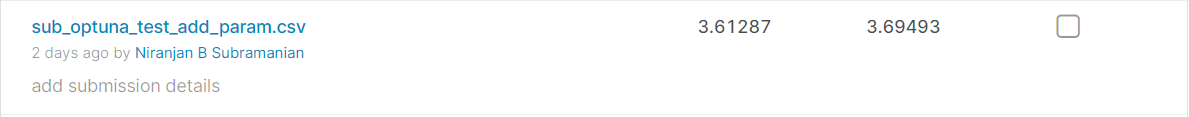

In [ ]:
from IPython.display import Image
print("Score in Kaggle")
Image("/content/drive/My Drive/Colab Notebooks/ELO/MODEL/lgb_rfe.PNG")

**Training a LGBM model with all the features**

In [ ]:
#selecting all the features except some basic ones which were used just to create new features
train_cols = [c for c in train_df.columns if c not in ['first_active_month', 'target','outliers','feature_1','feature_2','feature_3','refernce_month','hist_transac_purchase_date_max', 'hist_transac_purchase_date_min', 'new_transac_purchase_date_max', 'new_transac_purchase_date_min',\
'hist_purchase_date_last', 'hist_purchase_date_first', 'reference_month', 'hist_purchase_a_date_last', 'hist_purchase_a_date_first', 'new_purchase_date_last', 'new_purchase_date_first','card_id', \
'first_active_month','ref_first_month_diff_days']]

In [ ]:
%%time
param =  {
                    'colsample_bytree': 0.35120050902766814,
                    'subsample': 0.7640712594837535,
                    'max_depth': 6,
                    'reg_alpha': 4.054941002128766,
                    'reg_lambda': 9.687137168616093,
                    'min_split_gain': 2.160075593248262,
                    'min_child_weight': 16.067553828016983,
                    'min_data_in_leaf': 17,
                    'objective'         : 'regression',
                    'boosting_type'     : 'gbdt',
                    'metric'            : 'rmse',
                    'learning_rate'     : 0.01,
                    'num_leaves'        : 60,
                    'data_random_seed'  : 2019,
                    'max_bin'           : 255,
                    'nthread'           : 8
                }
#prepare fit model with cross-validation
folds = StratifiedKFold(n_splits=9, shuffle=True, random_state=2019)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()
#run model

for fold_, (trn_idx, val_idx) in enumerate(
                                           folds.split(train_df,outliers.values)):
    #strLog = "fold {}".format(fold_)
    print("fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][train_cols], \
                           label=target.iloc[trn_idx])#, categorical_feature=cat)
    val_data = lgb.Dataset(train_df.iloc[val_idx][train_cols], \
                           label=target.iloc[val_idx])#, categorical_feature=cat)

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], \
                    verbose_eval=200, early_stopping_rounds = 150)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][train_cols], num_iteration=clf.best_iteration)
    
    predictions += clf.predict(test_df[train_cols], num_iteration=clf.best_iteration) / folds.n_splits
    
strRMSE = "".format(np.sqrt(mean_squared_error(oof, target)))
print(strRMSE)

fold 0
Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 3.60827	valid_1's rmse: 3.65873
[400]	training's rmse: 3.5373	valid_1's rmse: 3.64238
[600]	training's rmse: 3.495	valid_1's rmse: 3.64029
[800]	training's rmse: 3.46504	valid_1's rmse: 3.63953
Early stopping, best iteration is:
[761]	training's rmse: 3.47071	valid_1's rmse: 3.63921
fold 1
Training until validation scores don't improve for 150 rounds
[200]	training's rmse: 3.60612	valid_1's rmse: 3.67788
[400]	training's rmse: 3.53479	valid_1's rmse: 3.6613
[600]	training's rmse: 3.4959	valid_1's rmse: 3.65731
[800]	training's rmse: 3.46344	valid_1's rmse: 3.65547
[1000]	training's rmse: 3.43454	valid_1's rmse: 3.65463
[1200]	training's rmse: 3.40882	valid_1's rmse: 3.65402
[1400]	training's rmse: 3.38446	valid_1's rmse: 3.65378
Early stopping, best iteration is:
[1351]	training's rmse: 3.38928	valid_1's rmse: 3.65375
fold 2
Training until validation scores don't improve for 150 rounds
[200]	tra

In [ ]:
sub_df = pd.DataFrame({"card_id":card_id.values})
sub_df["target"] = predictions
sub_df.to_csv("sub_lgb_323_feat.csv", index=False)

In [ ]:
import pickle
pickle.dump(clf, open('lgb_final_323_tune.sav', 'wb'))

In [ ]:
np.save('oof_lgb_323_feat.npy', oof)
np.save('pred_lgb_323_feat.npy', predictions)

Score in Kaggle


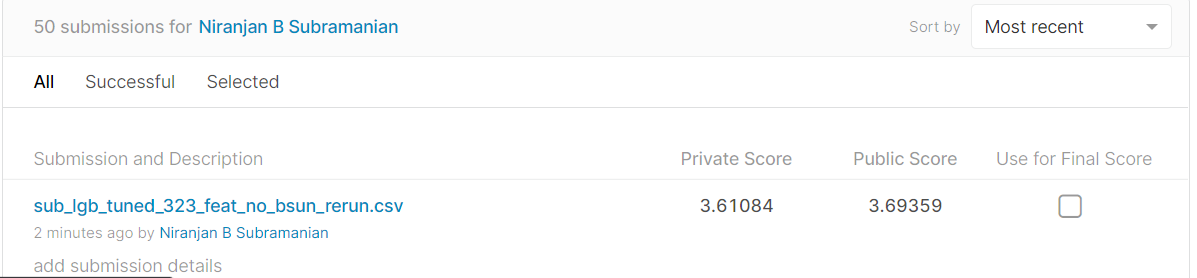

In [ ]:
from IPython.display import Image
print("Score in Kaggle")
Image("/content/drive/My Drive/Colab Notebooks/ELO/MODEL/lgb final score.PNG")

Using all the features does increase the performance of the model dramatically. The score went from 3.61287 to 3.61084 which is a huge improvement.

So, we'll use all the features to train the XGB model.

### XGBOOST

##### HYPERPARAMETER TUNING USING RANDOMIZED SEARCHCV

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import xgboost as xgb
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error

xgb = xgb.XGBRegressor(learning_rate=0.01, n_estimators=100, objective= 'reg:linear', \
                       eval_metric ='rmse', silent=True, nthread=1, tree_method='gpu_hist')

parameters = {
         'num_boost_round': [10, 25, 50], 'eta': [0.05, 0.1, 0.3],
         'max_depth': [3, 4, 5, 6,], 'subsample':[i/10.0 for i in range(6,10)],
         'colsample_bytree':[i/10.0 for i in range(6,10)], "min_samples_split": sp_randint(2, 11),
         "min_samples_leaf": sp_randint(1, 11), "min_child_weight": range(1,6,2),
         'gamma':[i/10.0 for i in range(0,5)], 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
    }

random_search = RandomizedSearchCV(xgb, param_distributions=parameters, \
                cv=StratifiedKFold(n_splits=9, random_state=42).split(train_df,outliers.values),\
                 n_jobs=-1, n_iter=30, verbose=3)

random_search.fit(train_df, target)

Fitting 9 folds for each of 30 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 11.5min finished


CPU times: user 4.76 s, sys: 8.2 s, total: 13 s
Wall time: 11min 33s


In [ ]:
random_search.best_params_

{'colsample_bytree': 0.9,
 'eta': 0.3,
 'gamma': 0.3,
 'max_depth': 6,
 'min_child_weight': 1,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'num_boost_round': 25,
 'reg_alpha': 1e-05,
 'subsample': 0.8}

###### XGBOOST WITH BEST PARAMETERS

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

xgb_params = {
              'eta': 0.3, 'max_depth': 6, 'subsample': 0.8, 'colsample_bytree': 0.9, \
              'learning_rate':0.01, 'gamma':0.3, 'min_samples_leaf' : 7, 'min_samples_split': 7, \
              'num_boost_round': 25, 'reg_alpha': 1e-05,'objective': 'reg:linear', 'eval_metric': 'rmse', \
              'silent': True, 'tree_method':'gpu_hist'
              }


FOLDs = KFold(n_splits=9, shuffle=True, random_state=1989)

oof_xgb = np.zeros(len(train_df))
predictions_xgb = np.zeros(len(test_df))


for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train_df,outliers.values)):
    trn_data = xgb.DMatrix(data=train_df.iloc[trn_idx], label=target.iloc[trn_idx])
    val_data = xgb.DMatrix(data=train_df.iloc[val_idx], label=target.iloc[val_idx])
    watchlist = [(trn_data, 'train'), (val_data, 'valid')]
    print("xgb " + str(fold_) + "-" * 50)
    num_round = 10000
    xgb_model = xgb.train(xgb_params, trn_data, num_round, watchlist, \
                          early_stopping_rounds=200, verbose_eval=200)
    oof_xgb[val_idx] = xgb_model.predict(xgb.DMatrix(train_df.iloc[val_idx]), \
                                         ntree_limit=xgb_model.best_ntree_limit+50)

    predictions_xgb = predictions_xgb + xgb_model.predict(xgb.DMatrix(test_df), \
                            ntree_limit=xgb_model.best_ntree_limit+50) / FOLDs.n_splits

np.sqrt(mean_squared_error(oof_xgb, target))

xgb 0--------------------------------------------------
[0]	train-rmse:3.92744	valid-rmse:4.10747
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[200]	train-rmse:3.56353	valid-rmse:3.85181
[400]	train-rmse:3.47456	valid-rmse:3.8299
[600]	train-rmse:3.41372	valid-rmse:3.82396
[800]	train-rmse:3.36164	valid-rmse:3.82258
[1000]	train-rmse:3.31169	valid-rmse:3.82155
[1200]	train-rmse:3.26657	valid-rmse:3.82073
Stopping. Best iteration:
[1107]	train-rmse:3.28661	valid-rmse:3.82069

xgb 1--------------------------------------------------
[0]	train-rmse:3.96001	valid-rmse:3.84891
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[200]	train-rmse:3.59158	valid-rmse:3.59259
[400]	train-rmse:3.5022	valid-rmse:3.5818
[600]	train-rmse:3.43727	valid-rmse:3.57979
[800]	train-rmse:3.38594	valid-rmse:3.57893
S

3.6699344183630043

In [ ]:
import pickle
pickle.dump(xgb_model, open('/content/drive/My Drive/case study/upload 15mis/xgb_final_323_tune.sav', 'wb'))

In [ ]:
np.save('oof_xgb_323_feat.npy', oof_xgb)
np.save('pred_xgb_323_feat.npy', predictions_xgb)

Score in Kaggle


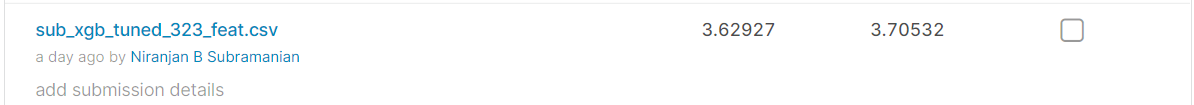

In [ ]:
from IPython.display import Image
print("Score in Kaggle")
Image("/content/drive/My Drive/Colab Notebooks/ELO/MODEL/xgb final.PNG")

The XGBOOST model is not as good as the LightGBM

### **STACKING**

##### **SIMPLE BLENDING WITH 80% WEIGHT TO LGBM PREDICTIONS AND 20% WEIGHT TO XGB PREDICTIONS**

In [ ]:
fianl_pred =0.8*pred_lgb + 0.2*pred_xgb
sub_df = pd.DataFrame({"card_id":card_id.values})
sub_df["target"] = fianl_pred
sub_df.to_csv("0.8lgb_0.2xgb_blend.csv", index=False)
!cp 0.8lgb_0.2xgb_blend.csv '/content/drive/My Drive/case study/upload 15mis/'

Score in Kaggle


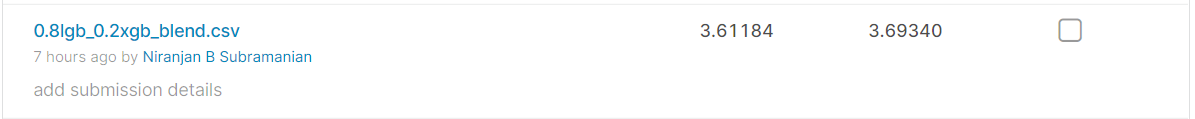

In [ ]:
from IPython.display import Image
print("Score in Kaggle")
Image("/content/drive/My Drive/Colab Notebooks/ELO/MODEL/0.8LGB_00.2XGB.PNG")

Simple weight based blending of LGBM AND XGB is better than the latter score alone.

##### In the following we'll create a simple bagging model then will be stacked with XGBOOST as a metalearner. 

First the data is split into 80-20 for train and test. We'll call this x_test. This will be used to evaluate our model.

Then again we split the 80% data into 50-50 x1_train and x1_test.

The x1_train will be used to train the model and x1_test will be used to tune the hyperparameters.

Once we have the best model with best hyperparameter we'll train the model on the whole dataset and test on the kaggle submission file.



In [ ]:
%%time
from tqdm import tqdm
from sklearn.linear_model import Ridge
#number of base learners
bl = [100, 200, 300, 500]
#list to score rmse
score = []
#loop through all the no of base learners
for estimator in tqdm(bl):
  
  #list to store the base leaarners
  base_learners = []
  #loop through the list of base learners
  for i in range(estimator):
    max = len(x1_train)
    
    #create bootstrap data by randomly choosing pts with replacement
    idx = np.random.randint(0, max, size=50000)
    sample_x = x1_train.iloc[idx]
    sample_y = y1_train.iloc[idx]
    
    #instantiate the classifier
    clf = DecisionTreeRegressor(max_depth=5)
    
    #fit the classifier with the sampled data
    clf.fit(sample_x, sample_y)
    
    #append the classifier to the list of base learners
    base_learners.append(clf)
  
  #store the predictions of x1_test 50% of data
  df = pd.DataFrame()
  for idx, dt in enumerate(base_learners):
    pred = dt.predict(x1_test)
    df['clf{}'.format(idx+1)] = pred

  #training metalearner XGB
  num_round = 5000
  train = xgb.DMatrix(data=df, label=y1_test)
  watchlist=train

  xgb_model = xgb.train(train, num_round, verbose_eval=200)
  
  #predict on the test data 20% of the original data
  test = pd.DataFrame()
  for idx, dt in enumerate(base_learners):
    pred = dt.predict(x_test)
    test['clf{}'.format(idx+1)] = pred
  
  #calculate the RMSE for the x_test
  prediction = xgb_model.predict(xgb.DMatrix(test))
  s = np.sqrt(mean_squared_error(prediction, y_test))
  print('RMSE:', s)

  #append the RMSE to the list score
  score.append(s)


 25%|██▌       | 1/4 [09:21<28:03, 561.23s/it]

RMSE: 3.74588409339133



 50%|█████     | 2/4 [28:02<24:18, 729.25s/it]

RMSE: 3.7547066784900025



 75%|███████▌  | 3/4 [56:09<16:56, 1016.47s/it]

RMSE: 3.768748080992725



100%|██████████| 4/4 [1:42:47<00:00, 1541.78s/it]

RMSE: 3.7888090596986275
CPU times: user 1h 42min 39s, sys: 4.38 s, total: 1h 42min 43s
Wall time: 1h 42min 47s


Let's plot the number of estimators on the x-axis against the RMSE values on the y-axis.

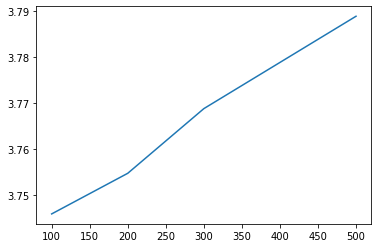

In [ ]:
import matplotlib.pyplot as plt
plt.plot(bl, score)

Looks like 100 base learners has the lowest RMSE. So, we'll use 100 base learners to build the model.

In [ ]:
#number of base learners
bl = 100
#list to store all the base learners
base_learners = []
#loop through the no of base learners
for i in range(bl):
    max = len(x1_train)
    idx = np.random.randint(0, max, size=50000)
    #create bootstrap data by randomly choosing pts with replacement
    sample_x = x1_train.iloc[idx]
    sample_y = y1_train.iloc[idx]
    #instantiate a classifier
    clf = DecisionTreeRegressor(max_depth=5)
    #fit the classifier on the bootstrapped data
    clf.fit(sample_x, sample_y)
    #add the base learner to the list
    base_learners.append(clf)

#create a DF to store the predictions
df = pd.DataFrame()
#loop through all the base learners and predict the test data 50%
for idx, dt in enumerate(base_learners):
  pred = dt.predict(x1_test)
  df['clf{}'.format(idx+1)] = pred
df.head()

,clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10,clf11,clf12,clf13,clf14,clf15,clf16,clf17,clf18,clf19,clf20,clf21,clf22,clf23,clf24,clf25,clf26,clf27,clf28,clf29,clf30,clf31,clf32,clf33,clf34,clf35,clf36,clf37,clf38,clf39,clf40,...,clf61,clf62,clf63,clf64,clf65,clf66,clf67,clf68,clf69,clf70,clf71,clf72,clf73,clf74,clf75,clf76,clf77,clf78,clf79,clf80,clf81,clf82,clf83,clf84,clf85,clf86,clf87,clf88,clf89,clf90,clf91,clf92,clf93,clf94,clf95,clf96,clf97,clf98,clf99,clf100
0,0.494199,0.520884,0.215122,0.507670,0.548381,-0.101815,0.333711,0.427894,0.326794,0.508397,0.801646,0.707188,0.445523,0.478445,0.481479,0.606709,0.368712,0.526012,0.300956,0.540266,0.555842,0.461770,0.584277,0.538621,0.568966,0.581839,0.585741,0.242293,0.601687,0.375137,0.306717,0.416809,0.421177,0.275577,0.422642,0.567555,0.604033,0.587885,0.572661,0.606709,...,0.435747,0.509859,0.204846,0.571523,0.407231,0.554180,0.622947,0.128047,0.557531,0.449610,0.587864,0.552577,0.532817,0.475905,0.591296,-0.019402,0.288267,0.110847,0.481580,-0.047081,0.549859,0.568016,0.337908,0.559930,0.242379,0.387690,0.521055,0.467182,-0.084413,0.632634,0.495720,0.560631,0.253733,0.541251,0.384766,0.510501,0.406000,0.563748,0.583072,0.150439
1,-0.833065,-0.928526,-0.648493,-0.441737,-0.314416,-0.788799,-0.279563,-0.363044,-0.709027,-0.309565,-1.159525,-1.189003,-0.763704,-0.631453,-0.699921,-0.359477,-0.742185,-0.808488,-0.333762,-0.375329,-0.764001,-0.352172,-0.456041,-0.433181,-0.747449,-1.032445,-0.368832,-0.741440,-0.679588,-0.753535,-0.638667,-0.531712,-0.826396,-0.556960,-0.622785,-0.826098,-0.668610,-0.715115,-0.907832,-1.113448,...,-0.341818,-0.339563,-0.591045,-0.750489,-0.161346,-0.132252,-0.680506,-0.359242,-0.789814,-0.806289,-0.776113,-0.788604,-0.768292,-0.763869,-1.209822,-0.087655,-1.139751,-0.635551,-0.655673,-1.153666,-0.913417,-0.107617,-0.730050,-0.489730,-0.757050,-0.657532,-0.930387,-0.482875,-0.569525,-0.272469,-1.118995,-0.800674,-0.384592,-0.690400,-0.735426,-0.653416,-0.685610,-0.734143,-0.749916,-0.859011
2,0.494199,0.520884,0.036589,0.507670,0.055180,-0.190275,0.333711,0.427894,0.326794,0.508397,0.801646,0.707188,0.445523,-0.149345,1.252817,0.569749,-0.188207,0.526012,0.887132,0.540266,0.555842,0.461770,0.584277,0.538621,-0.226899,0.581839,0.585741,0.720371,0.328716,-0.218894,0.928279,-0.182710,-0.208691,0.275577,0.004794,-0.182390,0.604033,0.007102,0.572661,0.606709,...,0.435747,0.509859,0.397841,0.571523,0.407231,0.554180,0.622947,0.673618,0.344832,0.449610,0.587864,0.552577,0.000907,0.475905,0.591296,0.696439,0.288267,-0.159397,0.481580,0.083925,0.549859,0.568016,0.052523,-0.046356,-0.180855,-0.153509,0.521055,0.467182,-0.041251,0.632634,0.495720,0.560631,0.253733,-0.118836,0.384766,0.510501,0.406000,0.563748,0.081527,-0.198216
3,-0.919025,-0.554937,-0.908352,-1.323837,-0.518661,-0.125638,-0.239234,-1.251950,-1.065314,-1.405810,-0.216282,-0.243376,-0.314031,-0.648289,-0.408791,-1.246335,-0.504527,-1.066205,-1.088352,-0.563182,-0.952528,-0.824186,-0.023497,-0.548693,-1.059819,-1.004120,-0.197033,-0.136255,-0.780940,-0.454024,-0.702105,0.071955,-0.267003,-0.179123,-0.379420,-0.902487,-0.930573,-0.816050,-0.110232,-0.517041,...,-0.286846,-0.714228,0.501768,-0.903186,-0.433312,-0.852283,0.181054,-1.546723,-1.211938,-0.276685,-1.072764,-0.284994,-0.568755,-0.835497,-0.634870,-0.412494,-0.439402,-0.395147,-1.110159,-0.283378,-0.895551,-0.718091,-0.657937,-0.490722,-0.889538,-0.773836,-0.813294,-0.340491,-0.329429,-1.333587,-0.624299,-0.677471,-0.814040,-1.015502,-1.148582,-1.219987,-0.569526,-0.640926,-0.629936,-0.465188
4,-0.271775,-0.374137,0.036589,-0.441737,-0.314416,-0.190275,-0.279563,-0.363044,-0.235112,-0.309565,-1.159525,-1.189003,-0.241085,-0.149345,-0.249629,-0.359477,-0.188207,-0.808488,-0.333762,-0.375329,-1.098886,-0.352172,-0.456041,-0.433181,-0.226899,-1.032445,-0.368832,-0.277045,-0.307590,-0.218894,-0.223527,-0.182710,-0.208691,0.004359,0.004794,-0.212032,-0.133330,0.007102,-0.907832,-1.113448,...,-0.341818,-0.339563,-0.178662,-0.228577,-

Now we'll train the meta model which is XGBOOST.

In [ ]:
import xgboost as xgb
xgb_params = {'eta': 0.001, 'max_depth': 7, 'subsample': 0.8, 'colsample_bytree': 0.8, 
          'objective': 'reg:linear', 'eval_metric': 'rmse', 'silent': True, 'tree_method':'hist'}

num_round = 5000
train = xgb.DMatrix(data=df, label=y1_test)
watchlist=train

xgb_model = xgb.train(xgb_params, train, num_round, verbose_eval=200)

#make predictions on the test set 20% data
test = pd.DataFrame()
for idx, dt in enumerate(base_learners):
  pred = dt.predict(x_test)
  test['clf{}'.format(idx+1)] = pred

In [ ]:
#calculate the RMSE value
prediction = xgb_model.predict(xgb.DMatrix(test))
s = np.sqrt(mean_squared_error(prediction, y_test))
print('RMSE:', s)
score.append(s)

RMSE: 3.7587417865524997


**making final prediction - training on whole data**

In [ ]:
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

In [ ]:
#number of base learners
bl = 100
#list to store all the base learners
base_learners = []
#loop through the no of base learners
for i in range(bl):
    #training on the whole data
    max = len(train_df[train_cols])
    idx = np.random.randint(0, max, size=50000)
    #create bootstrap data by randomly choosing pts with replacement
    sample_x = train_df[train_cols].iloc[idx]
    sample_y = target.iloc[idx]
    #instantiate a classifier
    clf = DecisionTreeRegressor(max_depth=5)
    #fit the classifier on the bootstrapped data
    clf.fit(sample_x, sample_y)
    #add the base learner to the list
    base_learners.append(clf)

#create a DF to store the predictions
df = pd.DataFrame()
#loop through all the base learners all predict the test data
for idx, dt in enumerate(base_learners):
  pred = dt.predict(train_df[train_cols])
  df['clf{}'.format(idx+1)] = pred
df.head()

,clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10,clf11,clf12,clf13,clf14,clf15,clf16,clf17,clf18,clf19,clf20,clf21,clf22,clf23,clf24,clf25,clf26,clf27,clf28,clf29,clf30,clf31,clf32,clf33,clf34,clf35,clf36,clf37,clf38,clf39,clf40,...,clf61,clf62,clf63,clf64,clf65,clf66,clf67,clf68,clf69,clf70,clf71,clf72,clf73,clf74,clf75,clf76,clf77,clf78,clf79,clf80,clf81,clf82,clf83,clf84,clf85,clf86,clf87,clf88,clf89,clf90,clf91,clf92,clf93,clf94,clf95,clf96,clf97,clf98,clf99,clf100
0,-0.225156,-0.320996,-0.246741,-0.223829,-0.266014,-0.407913,-0.186145,-0.592907,-0.241513,-0.315529,-0.296225,-0.436041,-0.212701,-0.283879,-0.225708,-0.215305,-0.329638,-0.340644,-0.327340,-0.266855,-0.421959,-0.311511,-0.204125,-0.602282,-0.444067,-0.497448,-0.406967,-0.365833,-0.481331,-0.208814,-0.307059,-0.490219,-0.504925,-0.438596,-0.329889,-0.471858,-0.452918,-0.288616,-0.354499,-0.232528,...,-0.436688,-0.208568,-0.244928,-0.455256,-0.18600,-0.507982,-0.488408,-0.339876,-0.239521,-0.375539,-0.217589,-0.274372,-0.352054,-0.529697,-0.267174,-0.404808,-0.234644,-0.222161,-0.333211,-0.201774,-0.188301,-0.417744,-0.340793,-0.134536,-0.732622,-0.388765,-0.254571,-0.414191,-0.436884,-0.399871,-0.403289,-0.351564,-0.440963,-0.446143,-0.207614,-0.443621,-0.208753,-0.309828,-0.295944,-0.337160
1,-1.857445,-1.999245,0.143004,0.089154,-1.243992,0.099734,-2.228633,-0.105974,-1.807319,-2.360468,0.002989,0.087405,-1.330290,0.001517,-2.337229,0.102449,-1.836534,-0.949888,-2.025263,-2.717134,-0.092473,-0.012694,0.019108,-4.621659,-1.889724,-1.546693,0.606861,-1.864916,0.059356,-2.634575,0.410820,-1.674394,0.103225,-1.528150,-1.774539,-2.171799,-0.051064,-1.050506,-0.038718,-2.334528,...,-0.019888,-0.008511,0.184180,-1.502837,0.51449,-1.780246,-2.126578,-1.671068,-1.438664,-0.136615,0.000547,-0.836513,-3.122190,-2.055812,-22.821225,-0.273507,-2.016371,-0.081958,-33.219281,-1.935574,0.203527,-1.995863,-2.217098,-1.367143,-33.219281,-1.594179,-0.962150,0.355168,-7.030830,0.149415,-1.249580,0.011258,-2.863846,-1.499647,0.135907,0.240512,-1.888371,-4.776333,-2.379679,0.039121
2,0.448579,0.282516,0.645393,-0.001087,0.612684,0.362219,0.566765,0.141078,0.422373,0.509077,0.268495,0.087405,0.531802,0.540036,0.094033,0.102449,0.123344,0.520086,0.201621,0.317679,0.417086,0.508155,0.019108,0.177374,0.583571,0.525899,0.058992,0.334742,0.578488,0.211669,0.838982,0.116278,0.233738,0.578024,0.633005,0.453920,0.578703,0.430839,0.164837,0.526766,...,0.513419,0.521915,0.184180,0.540599,0.51449,0.586284,0.502795,0.227263,0.527518,0.480890,0.610713,0.479694,0.294994,0.288420,0.407727,0.809490,0.698888,0.782291,0.531643,0.322268,0.203527,0.294892,0.362592,0.566541,0.507541,0.074180,0.566922,0.355168,0.528356,0.149415,0.432439,0.524669,0.553334,0.142750,0.691234,0.240512,0.232730,0.353347,0.485483,0.511641
3,-0.225156,0.042503,-0.246741,-0.223829,-0.266014,-0.407913,-0.186145,-0.105974,-0.241513,-0.029063,-0.296225,-0.107935,-0.212701,-0.283879,-0.225708,-0.215305,-0.329638,-0.008689,-0.045026,-0.266855,-0.080446,-0.311511,-0.204125,-0.001410,0.008394,-0.128316,-0.067448,-0.064065,-0.144970,-0.208814,-0.307059,-0.161942,-0.152705,-0.099339,-0.073348,-0.109570,-0.094221,-0.288616,-0.038718,-0.232528,...,-0.436688,-0.208568,-0.244928,-0.148742,-0.18600,-0.205794,0.007512,-0.339876,-0.239521,-0.136615,-0.217589,-0.274372,0.024337,-0.116027,-0.267174,-0.123091,-0.234644,-0.222161,-0.101538,-0.201774,-0.188301,-0.118664,-0.061516,-0.134536,-0.098407,0.008066,-0.254571,-0.074197,0.123803,-0.097735,-0.403289,-0.351564,-0.079562,-0.050410,-0.207614,-0.154886,-0.208753,-0.309828,0.060753,-0.337160
4,-0.806985,-0.543710,-0.246741,-0.223829,-0.266014,-0.407913,-0.827029,-0.270912,-0.241513,-0.315529,-0.296225,-0.107935,-0.756341,-0.766061,-0.752522,-0.215305,-0.329638,-0.340644,-0.598479,-0.266855,-0.738564,-0.311511,-0.714696,-0.153837,-0.324010,-0.128316,-0.067448,-0.064065,-0.144970,-0.797591,-0.307059,-0.161942,-0.152705,-0.099339,-0.329889,-0.109570,-0.659103,-0.696358,-0.354499,-0.232528,...,-0

In [ ]:
xgb_params = {'eta': 0.001, 'max_depth': 7, 'subsample': 0.8, 'colsample_bytree': 0.8, 
          'objective': 'reg:linear', 'eval_metric': 'rmse', 'silent': True, 'tree_method':'hist'}

num_round = 5000
train = xgb.DMatrix(data=df, label=target)
watchlist=train

xgb_model = xgb.train(xgb_params, train, num_round, verbose_eval=200)

In [ ]:
#kaggle submission test data
df = pd.DataFrame()
for idx, dt in enumerate(base_learners):
  pred = dt.predict(test_df[train_cols])
  df['clf{}'.format(idx+1)] = pred
df.head()

,clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10,clf11,clf12,clf13,clf14,clf15,clf16,clf17,clf18,clf19,clf20,clf21,clf22,clf23,clf24,clf25,clf26,clf27,clf28,clf29,clf30,clf31,clf32,clf33,clf34,clf35,clf36,clf37,clf38,clf39,clf40,...,clf61,clf62,clf63,clf64,clf65,clf66,clf67,clf68,clf69,clf70,clf71,clf72,clf73,clf74,clf75,clf76,clf77,clf78,clf79,clf80,clf81,clf82,clf83,clf84,clf85,clf86,clf87,clf88,clf89,clf90,clf91,clf92,clf93,clf94,clf95,clf96,clf97,clf98,clf99,clf100
0,-1.857445,-1.999245,-2.267977,-2.455072,-3.008357,-4.591418,-2.228633,-3.308297,-1.807319,-2.360468,-1.000437,-3.972314,-5.628541,-0.283879,-2.337229,-0.752533,-1.836534,-4.821658,-3.736976,-2.717134,-5.718062,-0.311511,-1.805402,-4.824746,-1.294054,-3.363472,-7.768625,-1.864916,-0.144970,-2.881408,-3.152286,-1.674394,-4.693989,-4.736457,-1.774539,-2.171799,-1.430509,-10.170977,-2.553299,-2.334528,...,-1.895564,-0.591619,-0.862592,-1.502837,-15.641431,-6.895394,-2.126578,-1.671068,-1.438664,-3.491248,-6.440921,-3.092961,-3.122190,-2.055812,-3.822410,-0.894362,-1.830197,-2.826622,-4.473938,-5.050084,-8.427421,-1.995863,-2.217098,-3.844054,-3.591105,-7.636862,-1.377678,-1.379940,-1.567330,-1.968312,-3.929297,-1.873945,-2.863846,-4.396678,-5.082036,-0.312121,-1.888371,-1.775573,-2.379679,-1.192589
1,-0.225156,0.042503,-0.246741,-0.223829,-0.266014,-0.407913,-0.186145,-0.270912,-0.241513,-0.315529,-0.296225,-0.107935,-0.212701,-0.283879,-0.225708,-0.215305,-0.329638,-0.340644,-0.327340,-0.266855,-0.421959,-0.311511,-0.204125,-0.153837,0.008394,-0.128316,-0.067448,-0.064065,-0.144970,-0.208814,-0.307059,-0.161942,-0.152705,-0.099339,-0.329889,-0.109570,-0.094221,-0.288616,-0.354499,-0.232528,...,-0.053340,-0.208568,-0.244928,-0.148742,-0.186000,-0.205794,-0.157529,-0.339876,-0.239521,-0.375539,-0.217589,-0.274372,-0.352054,-0.116027,-0.267174,-0.123091,-0.234644,-0.222161,-0.101538,-0.201774,-0.188301,-0.118664,-0.061516,-0.134536,-0.098407,0.008066,-0.254571,-0.074197,-0.111972,-0.097735,-0.403289,-0.351564,-0.079562,-0.050410,-0.207614,-0.154886,-0.208753,-0.309828,-0.295944,-0.337160
2,-0.806985,-1.283993,-1.108650,-0.839833,-0.266014,-0.407913,-0.827029,-0.901260,-0.890726,-1.278321,-0.929387,-1.165142,-0.756341,-0.766061,-0.752522,-0.733244,-0.329638,-0.340644,-1.072127,-0.266855,-0.738564,-0.311511,-0.714696,-0.907261,-0.875746,-0.497448,-1.513159,-0.894269,-1.170019,-0.797591,-0.963933,-1.482480,-0.938867,-1.054502,-0.756506,-0.810334,-0.659103,-0.696358,-0.910902,-0.927342,...,-9.680367,-0.899115,-1.632995,-0.148742,-0.904053,-0.507982,-0.841040,-0.765115,-0.879325,-1.019577,-0.748207,-0.876878,-0.352054,-0.839771,-0.877357,-0.616392,-1.143227,-0.749662,-0.333211,-0.696681,-0.888716,-1.899271,-0.791542,-0.937940,-0.292076,-0.617652,-0.860194,-0.843360,-1.124505,-0.880394,-0.403289,-0.902284,-0.893526,-1.051787,-0.616713,-0.846726,-0.774385,-0.890290,-0.694274,-0.337160
3,-0.225156,0.042503,-0.246741,-0.223829,-0.266014,-0.407913,-0.186145,-0.270912,-0.241513,-0.315529,-0.296225,-0.436041,-0.212701,-0.283879,-0.225708,-0.215305,-0.329638,-0.340644,-0.327340,-0.266855,-0.421959,-0.311511,-0.204125,-0.153837,0.008394,-0.497448,-0.067448,-0.064065,-0.481331,-0.208814,-0.307059,-0.161942,-0.152705,-0.438596,-0.329889,-0.471858,-0.094221,-0.288616,-0.354499,-0.232528,...,-0.436688,-0.208568,-0.244928,-0.148742,-0.186000,-0.507982,-0.488408,0.009083,-0.239521,-0.375539,-0.217589,-0.274372,-0.352054,-0.175255,-0.267174,-0.404808,-0.234644,-0.222161,-0.333211,-0.201774,-0.188301,-0.118664,-0.061516,-0.134536,-0.098407,0.008066,-0.254571,-0.074197,-0.436884,-0.097735,-0.403289,-0.351564,-0.440963,-0.446143,-0.207614,-0.443621,-0.208753,-0.309828,0.060753,-0.337160
4,-0.806985,-0.543710,-1.108650,-0.839833,-1.004097,-0.407913,-0.827029,-0.901260,-0.890726,-1.430156,-0.929387,-1.514833,-0.756341,-0.766061,-0.752522,-1.533220,-0.329638,-1.040812,-0.598479,-1.049374,-1.631674,-0.963668,-1.743455,-0.907261,-0.875746,-0.938505,-0.746202,-0.894269,-1.170019,-0.797591,-0.

In [ ]:
#save the predictions
p = xgb_model.predict(xgb.DMatrix(df))
sub_df = pd.DataFrame({"card_id":test_df['card_id'].values})
sub_df["target"] = p
sub_df.to_csv("new_arch_xgb_trfuda.csv", index=False)

Score in Kaggle


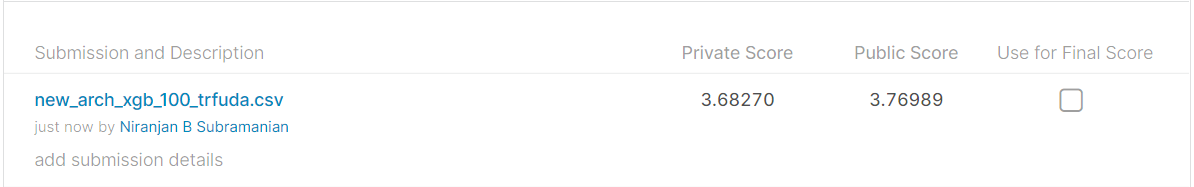

In [ ]:
from IPython.display import Image
print("Score in Kaggle")
Image("/content/drive/My Drive/case study/upload 15mis/new_arch_xgb.PNG")

The score gets worsen. Let's try a stacked model with ridge as a metalearner.

##### **STACKED MODEL WITH RIDGE REGRESSION AS META LEARNER**

###### **HYPERPARAMETER TUNING THE RIDGE**

In [ ]:
#loading the predictions of the trained lgb and xgb models to feed as the input to the meta learner
oof_xgb = np.load('/content/drive/My Drive/case study/upload 15mis/oof_xgb_323_feat.npy')
pred_xgb = np.load('/content/drive/My Drive/case study/upload 15mis/pred_xgb_323_feat.npy')
oof_lgb = np.load('/content/drive/My Drive/case study/upload 15mis/oof_lgb_tuned_323_final_stack.npy')
pred_lgb = np.load('/content/drive/My Drive/case study/upload 15mis/pred_lgb_tuned_323.npy_final_stack.npy')

train_stack = np.vstack([oof_xgb, oof_lgb]).transpose()
test_stack = np.vstack([pred_xgb, pred_lgb]).transpose()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

clf = Ridge()
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

grid_search = GridSearchCV(clf, param_grid=dict(alpha=alphas), \
                n_jobs=-1, verbose=3)

grid_search.fit(train_stack, target)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid_search.best_estimator_

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

###### **TRAINING WITH BEST HYPERPARAMETER**

In [ ]:
#loading the predictions of the trained lgb and xgb models to feed as the input to the meta learner
oof_xgb = np.load('/content/drive/My Drive/case study/upload 15mis/oof_xgb_323_feat.npy')
pred_xgb = np.load('/content/drive/My Drive/case study/upload 15mis/pred_xgb_323_feat.npy')
oof_lgb = np.load('/content/drive/My Drive/case study/upload 15mis/oof_lgb_tuned_323_final_stack.npy')
pred_lgb = np.load('/content/drive/My Drive/case study/upload 15mis/pred_lgb_tuned_323.npy_final_stack.npy')

train_stack = np.vstack([oof_xgb, oof_lgb]).transpose()
test_stack = np.vstack([pred_xgb, pred_lgb]).transpose()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
oof_stacked = np.zeros(train_stack.shape[0])
predictions_stacked = np.zeros(test_stack.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_stack, outliers.values)):
    print("Starting fold n={}".format(fold_))
    trn_data, trn_y = train_stack[trn_idx], target.iloc[trn_idx].values
    val_data, val_y = train_stack[val_idx], target.iloc[val_idx].values

    clf = Ridge(alpha=1)
    clf.fit(trn_data, trn_y)

    oof_stacked[val_idx] = clf.predict(val_data)
    predictions_stacked = predictions_stacked + clf.predict(test_stack) / folds.n_splits

sub_df = pd.DataFrame({"card_id":card_id.values})
sub_df["target"] = predictions_stacked
sub_df.to_csv("sub_full_stack_final_xgb_lgb.csv", index=False)
!cp sub_full_stack_final_xgb_lgb.csv '/content/drive/My Drive/case study/upload 15mis/'

Starting fold n=0
Starting fold n=1
Starting fold n=2
Starting fold n=3
Starting fold n=4


Score in Kaggle


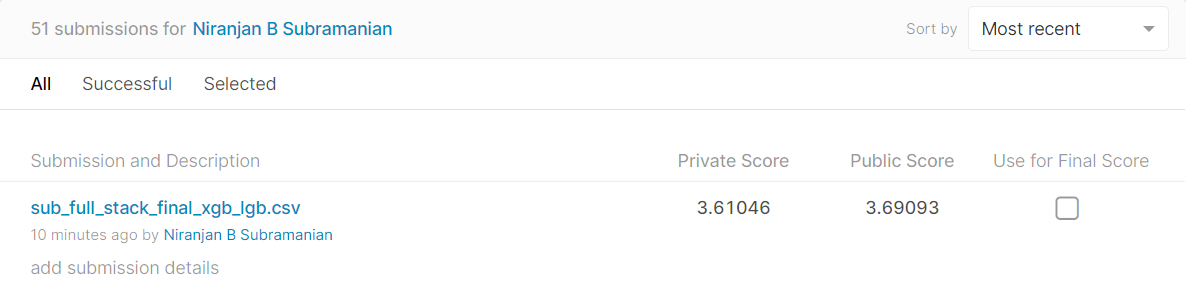

In [ ]:
from IPython.display import Image
print("Score in Kaggle")
Image("/content/drive/My Drive/Colab Notebooks/ELO/MODEL/stack final.PNG")

#### Neural Network based models

**ANN 5 Layer Dropout**

In [ ]:
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras import backend as K
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss',patience=6, verbose=1, mode='auto')

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_df[train_cols].shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss=root_mean_squared_error, optimizer="adam")

In [ ]:
model.fit(train_df[train_cols], target, batch_size=64, epochs=50, verbose=2, callbacks=[early_stop])

Epoch 1/50
 - 14s - loss: 3.3997
Epoch 2/50
 - 14s - loss: 3.4025
Epoch 3/50
 - 14s - loss: 3.3988
Epoch 4/50
 - 14s - loss: 3.4072
Epoch 5/50
 - 14s - loss: 3.3868
Epoch 6/50
 - 14s - loss: 3.3909
Epoch 7/50
 - 14s - loss: 3.4028
Epoch 8/50
 - 14s - loss: 3.4082
Epoch 9/50
 - 14s - loss: 3.3993
Epoch 10/50
 - 14s - loss: 3.3934
Epoch 11/50
 - 14s - loss: 3.4043
Epoch 00011: early stopping


In [ ]:
ypred = model.predict(test_df[train_cols])

In [ ]:
sub_df = pd.DataFrame({"card_id":test_df['card_id'].values})
sub_df["target"] = ypred
sub_df.to_csv("less_dp.csv", index=False)

Score in Kaggle


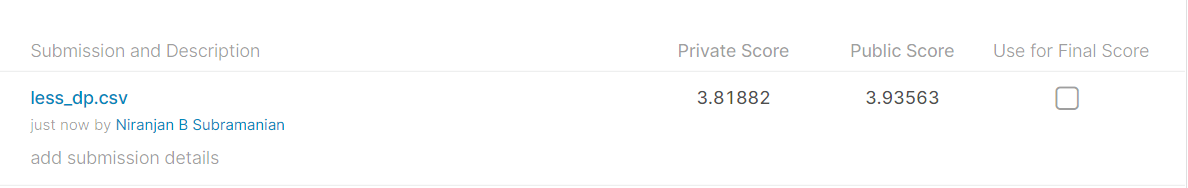

In [ ]:
from IPython.display import Image
print("Score in Kaggle")
Image("/content/drive/My Drive/case study/upload 15mis/less_Dp.PNG")

Some what similar performance to the previous model even after increasing the layers and reducing the dropout rate.

**Convolutional 1D Model:**

In [ ]:
train_cnn = train_df[train_cols].values.reshape(train_df[train_cols].shape[0], train_df[train_cols].shape[1], 1)
test_cnn = test_df[train_cols].values.reshape(test_df[train_cols].shape[0], test_df[train_cols].shape[1], 1)

In [ ]:
train_cnn.shape

(201917, 323, 1)


In [ ]:
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras import backend as K
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss',patience=4, verbose=1, mode='auto')

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
        
model = Sequential()

model.add(Conv1D(64, 2, activation="relu", input_shape=(323, 1)))
model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.6))

model.add(Conv1D(16, 2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dense(1))

model.compile(loss=root_mean_squared_error, optimizer="adam")

In [ ]:
model.fit(train_cnn, target, batch_size=12, epochs=30, verbose=2, callbacks=[early_stop])

Epoch 1/30
16827/16827 - 96s - loss: 302.4445
Epoch 2/30
16827/16827 - 96s - loss: 2.7283
Epoch 3/30
16827/16827 - 96s - loss: 2.8471
Epoch 4/30
16827/16827 - 94s - loss: 2.6732
Epoch 5/30
16827/16827 - 97s - loss: 2.8528
Epoch 6/30
16827/16827 - 96s - loss: 2.6224
Epoch 7/30
16827/16827 - 94s - loss: 2.7189
Epoch 8/30
16827/16827 - 94s - loss: 2.6761
Epoch 9/30
16827/16827 - 96s - loss: 2.6309
Epoch 10/30
16827/16827 - 94s - loss: 2.6834
Epoch 00010: early stopping


In [ ]:
ypred = model.predict(test_cnn)
sub_df = pd.DataFrame({"card_id":test_df['card_id'].values})
sub_df["target"] = ypred
sub_df.to_csv("cnn_30.csv", index=False)

Score in Kaggle


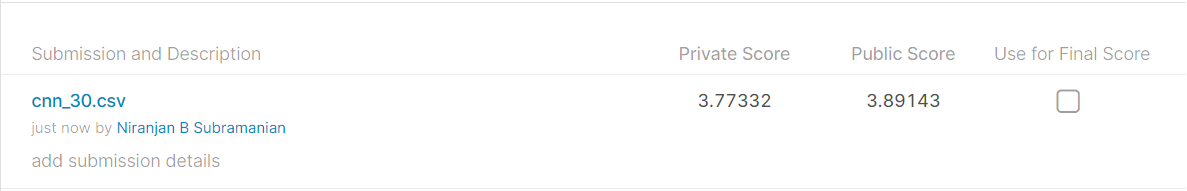

In [ ]:
from IPython.display import Image
print("Score in Kaggle")
Image("/content/drive/My Drive/case study/upload 15mis/cnn.PNG")

**CNN + LSTM**

**with maxpooling**

In [ ]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D 
from keras.layers import BatchNormalization, LSTM
from sklearn.metrics import mean_squared_error
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

filepath = '/content/drive/My Drive/case study/upload 15mis/weight/weights-{epoch:02d}-{loss:.2f}.hdf5'
early_stop = EarlyStopping(monitor='loss',patience=6, verbose=1, mode='auto')
model_ckpt = ModelCheckpoint(monitor='loss', save_best_only=True, verbose=1, mode='auto',filepath=filepath)

model = Sequential()
model.add(Embedding(324, 128, input_length=324))
model.add(Dropout(0.25))
model.add(Conv1D(64,3,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(2))

model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss=root_mean_squared_error)

Using TensorFlow backend.


In [ ]:
model.fit(train_df[train_cols], target, batch_size=2048, epochs=50, callbacks=[model_ckpt, early_stop])

Epoch 1/50
201917/201917 [==============================] - 41s 201us/step - loss: 3.8198

Epoch 00001: loss improved from inf to 3.81983, saving model to /content/drive/My Drive/case study/upload 15mis/weight/weights-01-3.82.hdf5
Epoch 2/50
201917/201917 [==============================] - 33s 161us/step - loss: 3.7844

Epoch 00002: loss improved from 3.81983 to 3.78442, saving model to /content/drive/My Drive/case study/upload 15mis/weight/weights-02-3.78.hdf5
Epoch 3/50
201917/201917 [==============================] - 34s 166us/step - loss: 3.7653

Epoch 00003: loss improved from 3.78442 to 3.76533, saving model to /content/drive/My Drive/case study/upload 15mis/weight/weights-03-3.77.hdf5
Epoch 4/50
201917/201917 [==============================] - 34s 167us/step - loss: 3.7521

Epoch 00004: loss improved from 3.76533 to 3.75206, saving model to /content/drive/My Drive/case study/upload 15mis/weight/weights-04-3.75.hdf5
Epoch 5/50
201917/201917 [==============================] - 34s 

In [ ]:
model = Sequential()
model.add(Embedding(324, 128, input_length=324))
model.add(Dropout(0.25))
model.add(Conv1D(64,3,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(2))

model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss=root_mean_squared_error)
#loading best weights
model.load_weights('/content/drive/My Drive/case study/upload 15mis/weight/weights-47-3.20.hdf5')

In [ ]:
ypred = model.predict(test_df[train_cols])

In [ ]:
sub_df = pd.DataFrame({"card_id":test_df['card_id'].values})
sub_df["target"] = ypred
sub_df.to_csv("cnn_lstm_F.csv", index=False)

Score in Kaggle


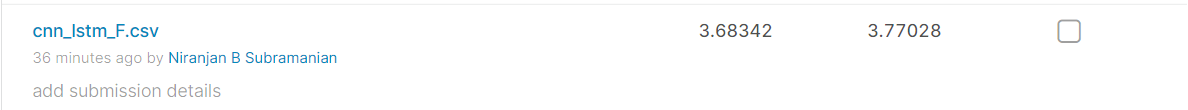

In [ ]:
from IPython.display import Image
print("Score in Kaggle")
Image("/content/drive/My Drive/case study/upload 15mis/cnn_f.PNG")

**without maxpooling**

In [ ]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D 
from keras.layers import BatchNormalization, LSTM
from sklearn.metrics import mean_squared_error
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

filepath = '/content/drive/My Drive/case study/upload 15mis/weight/weights-{epoch:02d}-{loss:.2f}.hdf5'
early_stop = EarlyStopping(monitor='loss',patience=6, verbose=1, mode='auto')
model_ckpt = ModelCheckpoint(monitor='loss', save_best_only=True, verbose=1, mode='auto',filepath=filepath)

model = Sequential()
model.add(Embedding(324, 128, input_length=324))
model.add(Dropout(0.25))
model.add(Conv1D(64,3,padding='valid',activation='relu',strides=1))

model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss=root_mean_squared_error)

In [ ]:
model.fit(train_df[train_cols], target, batch_size=512, epochs=50, callbacks=[model_ckpt, early_stop])

Epoch 1/50
201917/201917 [==============================] - 206s 1ms/step - loss: 3.7428

Epoch 00001: loss improved from 3.81497 to 3.74282, saving model to /content/drive/My Drive/case study/upload 15mis/weight/weights-01-3.74.hdf5
Epoch 2/50
201917/201917 [==============================] - 203s 1ms/step - loss: 3.7292

Epoch 00002: loss improved from 3.74282 to 3.72921, saving model to /content/drive/My Drive/case study/upload 15mis/weight/weights-02-3.73.hdf5
Epoch 3/50
201917/201917 [==============================] - 205s 1ms/step - loss: 3.7236

Epoch 00003: loss improved from 3.72921 to 3.72363, saving model to /content/drive/My Drive/case study/upload 15mis/weight/weights-03-3.72.hdf5
Epoch 4/50
201917/201917 [==============================] - 207s 1ms/step - loss: 3.7250

Epoch 00004: loss did not improve from 3.72363
Epoch 5/50
201917/201917 [==============================] - 206s 1ms/step - loss: 3.7145

Epoch 00005: loss improved from 3.72363 to 3.71454, saving model to /co

In [ ]:
model1 = Sequential()
model1.add(Embedding(324, 128, input_length=324))
model1.add(Dropout(0.25))
model1.add(Conv1D(64,3,padding='valid',activation='relu',strides=1))

model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss=root_mean_squared_error)

model1.load_weights('/content/drive/My Drive/case study/upload 15mis/weight/weights-48-3.40.hdf5')

In [ ]:
ypred = model1.predict(test_df[train_cols])

In [ ]:
sub_df = pd.DataFrame({"card_id":test_df['card_id'].values})
sub_df["target"] = ypred
sub_df.to_csv("cnn_lstm_E.csv", index=False)

Score in Kaggle


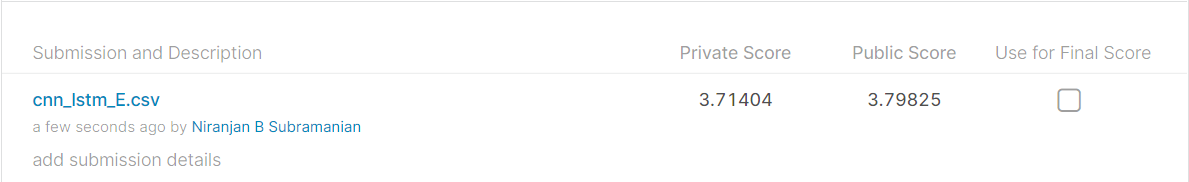

In [ ]:
from IPython.display import Image
print("Score in Kaggle")
Image("/content/drive/My Drive/case study/upload 15mis/cnn_e.PNG")

The performance of all the deep learning based models that we have tried are worse compared to the other models. However adding the cnn + lstm slightly improves the performance when compared to simple conv1d model.

The best score I get is by using the stacked model by using all the features. It gives me a score of 3.61046, this puts me in top 4% in the leaderboard.

Score in Kaggle


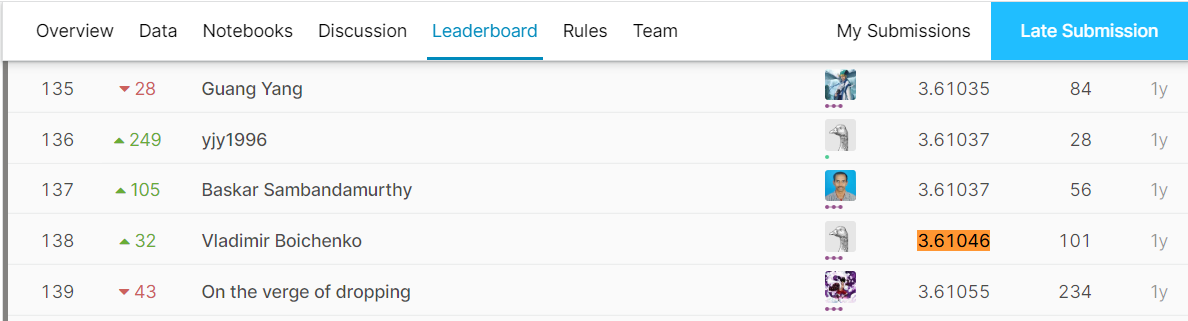

In [ ]:
from IPython.display import Image
print("Score in Kaggle")
Image("/content/drive/My Drive/Colab Notebooks/ELO/MODEL/leader.PNG")

**SUMMARY OF THE MODELS**

In [1]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Models", "Private Score", "Public Score"]

x.add_row(["LGBM with RFE features\n", 3.61287, 3.69493])
x.add_row(["LGBM with all the features\n", 3.61084, 3.69359])
x.add_row(["Simple weight Blending of predictions\n0.8*LGB prediction + 0.2*XGB predictions\n", 3.61184, 3.69340])
x.add_row(["XGBOOST with all the features\n", 3.62927, 3.70532])
x.add_row(["Simple Bagging model with\nDT base learner and stacked XGB as metalearner\n", 3.68270, 3.76989])
x.add_row(["Stacked LGB and XGB predictions\nwith Ridge as metalearner\n", 3.61046, 3.69093])
x.add_row(["ANN with 5 layers(reduced dropout)\n", 3.81882, 3.93563])
x.add_row(["Conv1D Model\n", 3.77332, 3.89143])
x.add_row(["Conv1D + LSTM Model with maxpool\n", 3.75455, 3.86007])
x.add_row(["Conv1D + LSTM Model without maxpool\n", 3.71404, 3.79825])

print(x)

+------------------------------------------------+---------------+--------------+
|                     Models                     | Private Score | Public Score |
+------------------------------------------------+---------------+--------------+
|             LGBM with RFE features             |    3.61287    |   3.69493    |
|                                                |               |              |
|           LGBM with all the features           |    3.61084    |   3.69359    |
|                                                |               |              |
|     Simple weight Blending of predictions      |    3.61184    |    3.6934    |
|    0.8*LGB prediction + 0.2*XGB predictions    |               |              |
|                                                |               |              |
|         XGBOOST with all the features          |    3.62927    |   3.70532    |
|                                                |               |              |
|           Simp

1) At first I tried LGBM with the features which is selected using the Recursive Feature Elimination. There are a total of 254 features. The hyperparameters are tuned using Optuna. We got a score of 3.61284.

2) Then I tried LGBM with all the features which is around 330. Using all the features improves the performance of the model dramatically. We got a score of around 3.61084 Since this is a huge improvement from the last model we'll use all the data to train the XGB.

3) For XGBOOST the hyperparameters are tuned using the RandomSearchCV. Using the XGB model we attain a score of 3.62927 which is not that much impressive as we have already attained better score by using LGBM.

4) Next I tried simple weight based blending of the predictions of both LGBM and XGB. We got a score of 3.61184 which is better than the XGB model alone.

5) The custom bagging model with DT as base learner and their predictions stacked with XGBOOST as a metalearner is the worst performant of all. It gives a score of 3.6827

6) Also tried neural network based architectures like 3, 5 layer MLP, a Conv1D and CNN + LSTM models but their performance are not comparable to others.

7) Finally a stacked model with Ridge as the metamodel gives the best score. It gives a score of 3.61046